<a href="https://colab.research.google.com/github/ajipermadi15/SistemRekomendasi/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MovieLens 100K

##Environment

##Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

--2023-10-17 06:22:58--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  11.2MB/s    in 0.4s    

2023-10-17 06:22:59 (11.2 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [3]:
columns = ['userId', 'movieId', 'rating', 'timestamp']
df_ratings = pd.read_csv('ml-100k/u.data', header=None, sep='\t')
df_ratings.columns = columns
df_ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
columns = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation |\
 Children's | Comedy | Crime | Documentary | Drama | Fantasy |\
 Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |\
 Thriller | War | Western"

df_genres = pd.read_csv('ml-100k/u.item', header=None, sep='|', encoding='latin-1', names=columns.split(' | '))
df_genres.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [7]:
df_genres['movie id'].is_unique

True

In [8]:
df_genres['movie title'].is_unique

False

##Data Preprocessing

###Missing Values

In [9]:
df_rating_missing = pd.DataFrame({'column': df_ratings.columns,
                                  'missing_values': [df_ratings[column].isnull().sum() for column in df_ratings.columns]})

df_rating_missing

,column,missing_values
0,userId,0
1,movieId,0
2,rating,0
3,timestamp,0


In [10]:
df_genres_missing = pd.DataFrame({'column': df_genres.columns,
                                  'missing_values': [df_genres[column].isnull().sum() for column in df_genres.columns]})

missing_genre_columns = df_genres_missing[5:]['missing_values'].sum()
df_genres_missing = df_genres_missing[:5].append({'column': 'all genre columns',
                                                  'missing_values': missing_genre_columns}, ignore_index=True)

df_genres_missing

<ipython-input-10-43805451cf5d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_genres_missing = df_genres_missing[:5].append({'column': 'all genre columns',


,column,missing_values
0,movie id,0
1,movie title,0
2,release date,1
3,video release date,1682
4,IMDb URL,3
5,all genre columns,0


In [11]:
df_genres = df_genres.drop(columns=df_genres_missing[df_genres_missing['missing_values'] > 0]['column'].values)
df_genres.head()

,movie id,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


###Duplicate/Inconsistency Data

In [12]:
df_duplicated = pd.DataFrame({'dataset': ['Dataset Rating', 'Dataset Informasi Film'],
                              'duplicated': [df_ratings.duplicated().sum(), df_genres.duplicated().sum()]})

df_duplicated

,dataset,duplicated
0,Dataset Rating,0
1,Dataset Informasi Film,0


In [13]:
df_genres['movie title'].value_counts()

Designated Mourner, The (1997)               2
Ice Storm, The (1997)                        2
That Darn Cat! (1997)                        2
Money Talks (1997)                           2
Sliding Doors (1998)                         2
                                            ..
Mary Shelley's Frankenstein (1994)           1
Kid in King Arthur's Court, A (1995)         1
Interview with the Vampire (1994)            1
Heavenly Creatures (1994)                    1
Scream of Stone (Schrei aus Stein) (1991)    1
Name: movie title, Length: 1664, dtype: int64

In [14]:
inconsistency = df_genres['movie title'].value_counts()
inconsistency_df = pd.DataFrame(inconsistency)
inconsistency_df.columns = ['number of movie id']
inconsistency_df = inconsistency_df[inconsistency_df['number of movie id'] > 1]

movie_ids = []
for title in inconsistency_df.index:
    movie_id = df_genres[df_genres['movie title'] == title]['movie id'].values
    movie_ids.append(tuple(movie_id))

inconsistency_df['movie_id'] = movie_ids
inconsistency_df.head()

,number of movie id,movie_id
"Designated Mourner, The (1997)",2,"(1256, 1257)"
"Ice Storm, The (1997)",2,"(305, 865)"
That Darn Cat! (1997),2,"(878, 1003)"
Money Talks (1997),2,"(876, 881)"
Sliding Doors (1998),2,"(1429, 1680)"


In [15]:
df_genres[df_genres['movie title'] == 'Ice Storm, The (1997)']

,movie id,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
304,305,"Ice Storm, The (1997)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
864,865,"Ice Storm, The (1997)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#save idx for duplicate titles
df_genres_clean = df_genres.copy()

map_id = {}
#for title in inconsistency_df.index:
#    idxs = df_genres_clean[df_genres_clean['movie title'] == title]['movie id'].values
#    for id in idxs[1:]:
#        map_id[id] = idxs[0]

for i in range(len(inconsistency_df)):
    for id in inconsistency_df['movie_id'].values[i][1:]:
        map_id[id] = inconsistency_df['movie_id'].values[i][0]

#drop duplicates
df_genres_clean.drop_duplicates(subset='movie title', keep='first', inplace=True)

In [17]:
map_id

{1257: 1256,
 865: 305,
 1003: 878,
 881: 876,
 1680: 1429,
 1617: 1175,
 1658: 711,
 303: 297,
 1654: 1234,
 1607: 1395,
 268: 246,
 1625: 1477,
 500: 304,
 1650: 1645,
 1606: 309,
 348: 329,
 680: 266,
 670: 573}

In [18]:
df_ratings_clean = df_ratings.copy()
df_ratings_clean['movieId'] = df_ratings_clean['movieId'].replace(map_id)
df_ratings_clean[df_ratings_clean['movieId'] == 1256]

,userId,movieId,rating,timestamp
15100,116,1256,1,876452651
51490,707,1256,2,880061190
61712,655,1256,3,887433685
63440,655,1256,3,887425655
66212,782,1256,2,891500230
68818,116,1256,1,876453222
90568,782,1256,1,891500230


In [19]:
df_ratings_clean = df_ratings_clean.groupby(['userId', 'movieId']).mean()['rating'].reset_index()
df_ratings_clean[df_ratings_clean['movieId'] == 1256]

,userId,movieId,rating
12311,116,1256,1.0
72232,655,1256,3.0
76743,707,1256,2.0
83420,782,1256,1.5


In [20]:
df_ratings_title = df_ratings_clean.merge(df_genres_clean[['movie id', 'movie title']], left_on='movieId', right_on='movie id', how='left')
df_ratings_title = df_ratings_title[['userId', 'movie title', 'rating']]
df_ratings_title['movie title'] = df_ratings_title['movie title'].replace(' \(\d+\)', '', regex=True)
df_ratings_title.head()

,userId,movie title,rating
0,1,Toy Story,5.0
1,1,GoldenEye,3.0
2,1,Four Rooms,4.0
3,1,Get Shorty,3.0
4,1,Copycat,3.0


In [21]:
df_ratings_title[df_ratings_title['movie title'] == 'Shawshank Redemption, The']

,userId,movie title,rating
63,1,"Shawshank Redemption, The",5.0
602,6,"Shawshank Redemption, The",4.0
817,7,"Shawshank Redemption, The",5.0
1292,10,"Shawshank Redemption, The",4.0
1729,13,"Shawshank Redemption, The",5.0
...,...,...,...
98035,927,"Shawshank Redemption, The",5.0
98229,930,"Shawshank Redemption, The",4.0
98356,932,"Shawshank Redemption, The",2.0
98606,933,"Shawshank Redemption, The",5.0


In [22]:
df_ratings[(df_ratings['userId'] == 933) & (df_ratings['rating'] == 5)]

,userId,movieId,rating,timestamp
67276,933,64,5,874853605
67558,933,98,5,874853734
73109,933,179,5,874854135
86500,933,474,5,874853734
89453,933,127,5,874853898
90497,933,56,5,874853688
94892,933,180,5,874854723
95748,933,100,5,874853927
96048,933,22,5,874853634


In [23]:
df_genres_clean[df_genres_clean['movie id'] == 64]

,movie id,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
63,64,"Shawshank Redemption, The (1994)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Data Pivoting

In [24]:
df_ratings_clean.pivot(index='userId', columns='movieId', values='rating').fillna(0)

movieId,1,2,3,4,5,6,7,8,9,10,...,1672,1673,1674,1675,1676,1677,1678,1679,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##EDA

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_genres_clean.head()

,movie id,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


(0.0, 900.0)

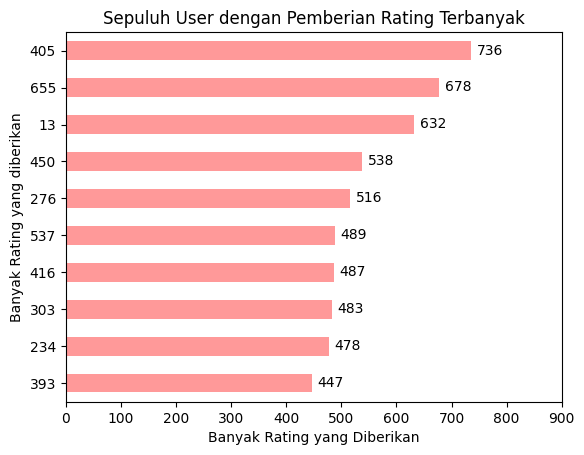

In [27]:
#10 user dengan rating terbanyak
top_10_active_users = df_ratings_title['userId'].value_counts()[:10]
top_10_active_users[::-1].plot(kind = 'barh', color = '#ff9999', title = 'Sepuluh User dengan Pemberian Rating Terbanyak', xlabel = 'User', ylabel = 'Banyak Rating yang diberikan')
plt.xlabel('Banyak Rating yang Diberikan')

for i, v in enumerate(top_10_active_users[::-1]):
    plt.text(v + 10, i - 0.1, str(v), color='black')#, fontweight='bold')

plt.xlim(0, 900)

In [28]:
np.mean(df_ratings_title['userId'].value_counts().values)

105.71898197242842

(0.0, 700.0)

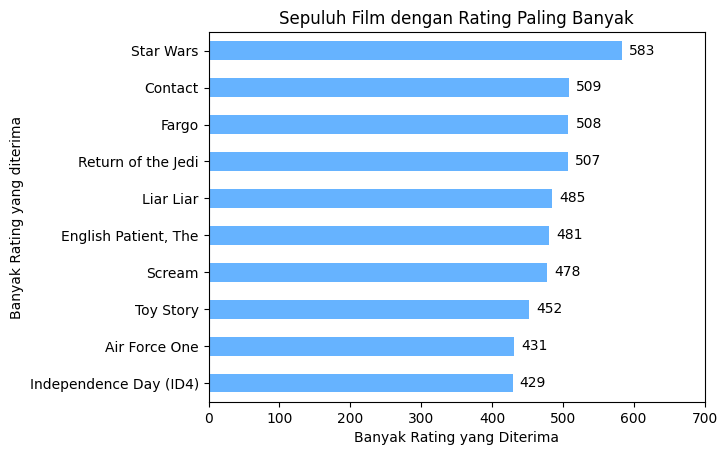

In [29]:
#10 Film dengan rating terbanyak
#plt.subplots_adjust(bottom=.25, left=.25)
top_10_popular_movies = df_ratings_title['movie title'].value_counts()[:10]
top_10_popular_movies[::-1].plot(kind = 'barh', color = '#66b3ff', title = 'Sepuluh Film dengan Rating Paling Banyak', xlabel = 'Movie', ylabel = 'Banyak Rating yang diterima')
plt.xlabel('Banyak Rating yang Diterima')

for i, v in enumerate(top_10_popular_movies[::-1]):
    plt.text(v + 10, i - 0.1, str(v), color='black')#, fontweight='bold')

plt.xlim(0, 700)

(0.0, 5.0)

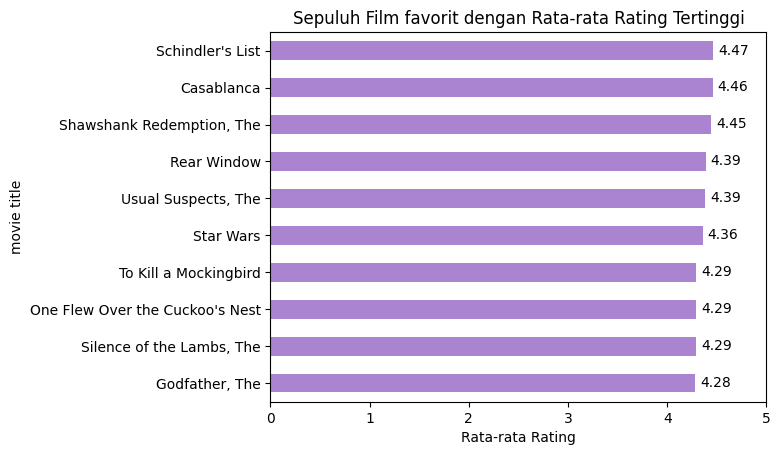

In [30]:
#10 Film dengan rata-rata rating terbesar untuk Film yang memiliki sebanyak minimal 200 rating
filter_movies = df_ratings_title.groupby('movie title')['rating'].agg(['count', 'mean'])
filter_movies = filter_movies[filter_movies['count'] >= 200]
highest_rating_movies = filter_movies.sort_values(by='mean', ascending=False)['mean'][:10]
highest_rating_movies[::-1].plot(kind = 'barh', color = '#AA83D1', title = 'Sepuluh Film favorit dengan Rata-rata Rating Tertinggi', xlabel = 'Movie')
plt.xlabel('Rata-rata Rating')

for i, v in enumerate(highest_rating_movies[::-1]):
    plt.text(v + .05, i - 0.1, str(round(v, 2)), color='black')#, fontweight='bold')

plt.xlim(0, 5)

(0.0, 40000.0)

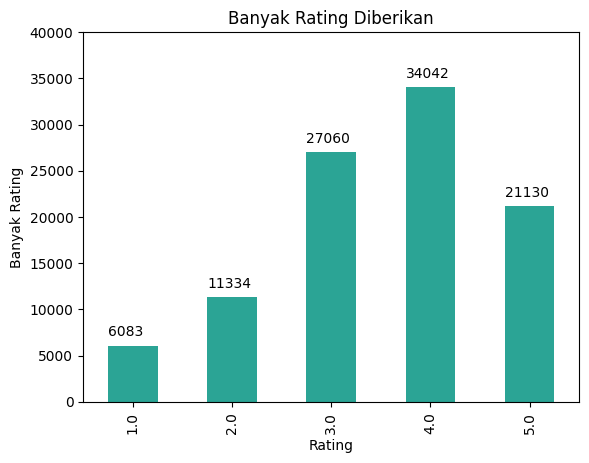

In [31]:
#Banyaknya rating diberikan
number_of_ratings = df_ratings_title.rating.value_counts()
number_of_ratings = number_of_ratings[number_of_ratings > 20]
number_of_ratings.sort_index().plot(kind = 'bar', color = '#2BA495', title = 'Banyak Rating Diberikan', xlabel = 'Rating', ylabel = 'Banyak Rating')

for i, v in enumerate(number_of_ratings.sort_index().values):
    plt.text(i - 0.25, v + 1000, str(v), color='black')#, fontweight='bold')

plt.ylim(0, 40000)

(0.0, 800.0)

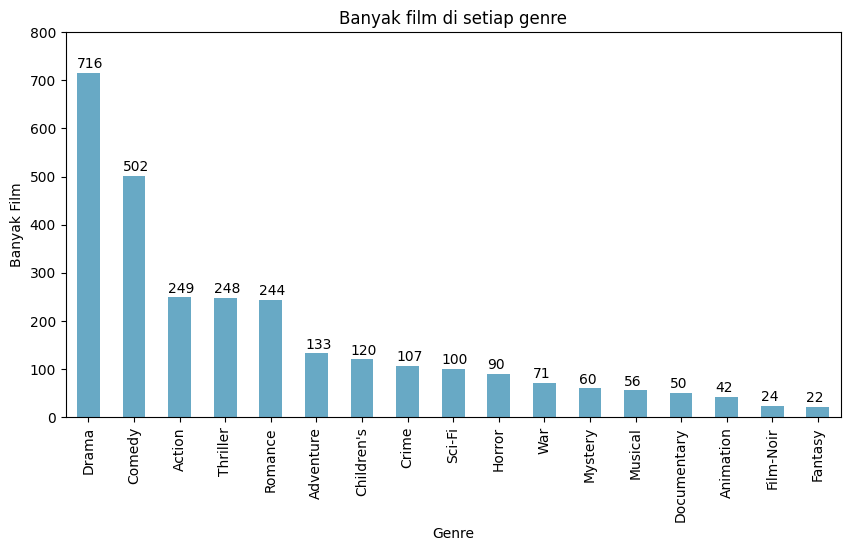

In [32]:
#Banyak Film di setiap genre
plt.figure(figsize=(10,5))

genre_counts = {'genre': [],
                'count': []}
for column in df_genres_clean.columns[3:-1]:
    count = df_genres_clean[column].sum()
    genre_counts['genre'].append(column)
    genre_counts['count'].append(count)

df_genre_count = pd.DataFrame(genre_counts).set_index('genre')['count'].sort_values(ascending=False)
df_genre_count.plot(kind = 'bar', color = '#68A9C5', title = 'Banyak film di setiap genre', xlabel = 'Genre', ylabel = 'Banyak Film')

for i, v in enumerate(df_genre_count.values):
    plt.text(i - 0.25, v + 10, str(v), color='black')#, fontweight='bold')

plt.ylim(0, 800)

##Split Data

In [33]:
#from numba import njit

def cleansing_data(dataframe, map_id):
    dataframe['movieId'] = dataframe['movieId'].replace(map_id)
    clean_dataframe = dataframe.groupby(['userId', 'movieId']).mean()['rating'].reset_index()
    return clean_dataframe

def indexTest(train_df, test_df):
    no_user, no_item = [], []
    idx_test = []

    train_pivot = train_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
    test_pivot = test_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

    for user in test_pivot.index:
        for item in test_pivot.columns:
            try:
                if test_pivot.loc[user,item] != 0 and train_pivot.loc[user,item] == 0:
                        idx_test.append((user, item))
            except:
                if user not in train_pivot.index:
                    no_user.append(user)
                if item not in train_pivot.columns:
                    no_item.append(item)

    return idx_test, no_user, no_item

In [34]:
#Import split data

#train
columns = ['userId', 'movieId', 'rating', 'timestamp']
df_ratings_train = pd.read_csv('ml-100k/u1.base', header=None, sep='\t')
df_ratings_train.columns = columns

#test
columns = ['userId', 'movieId', 'rating', 'timestamp']
df_ratings_test = pd.read_csv('ml-100k/u1.test', header=None, sep='\t')
df_ratings_test.columns = columns

In [35]:
#clean dataset from duplicate movies with different id

df_ratings_train = cleansing_data(df_ratings_train, map_id)
df_ratings_test = cleansing_data(df_ratings_test, map_id)

In [36]:
#find index test

idx_test, no_user, no_item = indexTest(df_ratings_train, df_ratings_test)

##Training Model

In [89]:
#@title Function

import pandas as pd
import numpy as np
from numba import njit
from matplotlib import pyplot as plt

@njit
def calculate_sse(P, Q, rating, n_user, n_item):
    pred = np.dot(P, Q)
    sse = 0
    for user in range(n_user):
        for item in range(n_item):
            if rating[user,item] > 0:
                sse += np.power(rating[user,item] - pred[user,item], 2)
    return sse

@njit
def calculate_abs_error(P, Q, rating, n_user, n_item):
    pred = np.dot(P, Q)
    abs_error = 0
    for user in range(n_user):
        for item in range(n_item):
            if rating[user,item] > 0:
                abs_error += abs(rating[user,item] - pred[user,item])
    return abs_error

@njit
def update_latent_factors(P, Q, rating, n_user, n_item, alpha, λ):
    for user in range(n_user):
        for item in range(n_item):
            if rating[user,item] > 0:
                err = rating[user,item] - np.dot(P[user,:], Q[:,item])
                #print(f'{P[user,0]} += {alpha} * ({err}*{Q[0,item]} - {λ} * {P[user,0]})')
                P[user,:] += alpha * (err*Q[:,item] - λ*P[user,:])
                Q[:,item] += alpha * (err*P[user,:] - λ*Q[:,item])
    return P, Q

class RecommenderSystem:
    def __init__(self, dataset, dataset_test = None, seed = 0):
        self.dataset = dataset
        self.dataset_test = dataset_test
        self.n_user = len(self.dataset['userId'].unique())
        self.n_item = len(self.dataset['movieId'].unique())
        self.n_rating = len(self.dataset)
        self.global_mean = self.dataset.iloc[:,2].mean()
        self.seed = seed
        np.random.seed(self.seed)
        print('init: success!') #DEBUG

    def _getindexTest(self):
        print('\nEnter getIndexTest function...') #DEBUG
        no_user, no_item = [], []
        self.idx_test = []

        train_pivot = self.dataset.pivot(index='userId', columns='movieId', values='rating').fillna(0)
        test_pivot = self.dataset_test.pivot(index='userId', columns='movieId', values='rating').fillna(0)
        print('pivoting: success!') #DEBUG
        for user in test_pivot.index:
            for item in test_pivot.columns:
                try:
                    if test_pivot.loc[user,item] != 0 and train_pivot.loc[user,item] == 0:
                            self.idx_test.append((user, item))
                except:
                    if user not in train_pivot.index:
                        no_user.append(user)
                    if item not in train_pivot.columns:
                        no_item.append(item)

        self.test_pivot = test_pivot
        self.train_columns, self.train_index = train_pivot.columns, train_pivot.index
        #self.test_columns, self.test_index = test_pivot.columns, test_pivot.index

    def _pivot_dataset(self):
        pivot = self.dataset.pivot(index='userId', columns='movieId', values='rating').fillna(0)

        return np.array(pivot.values.tolist())

    def _metric_eval(self):
        pivot_train = pd.DataFrame(data=self.R, index=self.train_index, columns=self.train_columns)

        sse, abs_error = 0, 0
        for user, item in self.idx_test:
            sse += np.power(pivot_train.loc[user, item] - self.test_pivot.loc[user, item], 2)
            abs_error += abs(pivot_train.loc[user, item] - self.test_pivot.loc[user, item])

        mse = sse / len(self.idx_test)
        rmse = np.sqrt(mse)
        mae = abs_error / len(self.idx_test)

        return rmse, mae

    def _matrix_factorization(self, epochs, k, alpha, λ):
        self.epochs = epochs
        self.k = k
        self.alpha = alpha
        self.λ = λ
        err_tolerance = 10**(-5)

        if type(self.dataset_test) != type(None):
            self._getindexTest()
        print('getIndex: success!') #DEBUG
        self.rating = self._pivot_dataset()

        #self.bu, self.bi = np.zeros(self.n_user), np.zeros(self.n_item)
        #self.P, self.Q = np.random.normal(size=(self.n_user, k)), np.random.normal(size=(k, self.n_item))

        mu, std = 0, 1
        self.P, self.Q = np.random.normal(mu, std, size=(self.n_user, k)), np.random.normal(mu, std, size=(k, self.n_item))

        if type(self.dataset_test) != type(None):
            self.rmse_train_list, self.rmse_test_list = [], []
            self.mae_train_list, self.mae_test_list = [], []
        else:
            self.rmse_list, self.mae_list = [], []
        print('Define new list: success!') #DEBUG
        for epoch in range(epochs):
#            for user in range(self.n_user):
#                for item in range(self.n_item):
#                    if self.rating[user,item] > 0:
#                        err = self.rating[user,item] - np.matmul(self.P[user,:], self.Q[:,item])
#                        self.P[user,:] += alpha * (err*self.Q[:,item] - self.λ*self.P[user,:])
#                        self.Q[:,item] += alpha * (err*self.P[user,:] - self.λ*self.Q[:,item])
            self.P, self.Q = update_latent_factors(self.P, self.Q, self.rating,\
                                                   self.n_user, self.n_item, self.alpha, self.λ)
            '''
            pred = np.matmul(self.P, self.Q)
            sse = 0
            for user in range(self.n_user):
                for item in range(self.n_item):
                    if self.rating[user,item] > 0:
                        sse += np.power(self.rating[user,item] - pred[user,item], 2)
            '''

            sse = calculate_sse(self.P, self.Q, self.rating, self.n_user, self.n_item)
            abs_error = calculate_abs_error(self.P, self.Q, self.rating, self.n_user, self.n_item)

            if type(self.dataset_test) != type(None):
                mse = sse / self.n_rating
                rmse_train = np.sqrt(mse)
                mae_train = abs_error / self.n_rating
                self.rmse_train_list.append(rmse_train)
                self.mae_train_list.append(mae_train)

                self.R = np.dot(self.P, self.Q)
                rmse_test, mae_test = self._metric_eval()
                self.rmse_test_list.append(rmse_test)
                self.mae_test_list.append(mae_test)
                print(f'Epoch {epoch+1}/{epochs} - RMSE: {rmse_train}, MAE: {mae_train} | RMSE_test: {rmse_test}, MAE_test: {mae_test}')

                if epoch > 2:
                    train_growth = [0 if (self.rmse_train_list[-i-1] - self.rmse_train_list[-i]) < err_tolerance else 1 for i in range(1,4)]
                    test_growth = [0 if (self.rmse_test_list[-i-1] - self.rmse_test_list[-i]) < err_tolerance else 1 for i in range(1,4)]
                    if ((0 in train_growth) and (0 in test_growth)) or (np.isnan(self.rmse_test_list).all()):
                        print(f'Model training is stopped at the epoch: {epoch+1}')
                        self.epochs = epoch+1
                        break

            else:
                mse = sse / self.n_rating
                rmse = np.sqrt(mse)
                mae = abs_error / self.n_rating
                self.rmse_list.append(rmse)
                self.mae_list.append(mae)
                print(f'Epoch {epoch+1}/{epochs} - RMSE: {rmse}, MAE: {mae}')

                if epoch > 2:
                    error_growth = [0 if (self.rmse_list[-i-1] - self.rmse_list[-i]) < err_tolerance else 1 for i in range(1,4)]
                    if (0 in error_growth) or (np.isnan(self.rmse_list).all()):
                        print(f'Model training is stopped at the epoch: {epoch+1}')
                        self.epochs = epoch+1
                        break

            print('update error: success!') #DEBUG

            if mse < 0.0005:
                break
        return self.P, self.Q

    def _plot_metric(self, idx=''):
        if type(self.dataset_test) != type(None):
            figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

            axes[0].plot(self.rmse_train_list, c='#ff9999', label='RMSE train')
            axes[0].plot(self.rmse_test_list, c='#66b3ff', label='RMSE test')

            axes[1].plot(self.mae_train_list, c='#ff9999', label='MAE train')
            axes[1].plot(self.mae_test_list, c='#66b3ff', label='MAE test')

            for i in range(2):
                axes[i].set_xlabel('Iterasi')
                axes[i].set_ylabel('Nilai')
                axes[i].legend()

            axes[0].title.set_text(f'Nilai RMSE dari Model {idx}')
            axes[1].title.set_text(f'Nilai MAE dari Model {idx}')
            #plt.show()
        else:
            figure = plt.figure(figsize=(7,5))
            plt.plot(self.mae_list, c='#ff9999', label='MAE')
            plt.plot(self.rmse_list, c='#66b3ff', label='RMSE')
            plt.xlabel("Iterasi")
            plt.ylabel("Nilai")
            plt.title(f"Nilai Metrik Evaluasi dari Model {idx}")
            plt.legend()
            #plt.grid()
            #plt.show()

        figure.savefig(f'fig_Model-{idx}_{self.seed}_{self.k}_{self.alpha}_{self.λ}.png', transparent=True)


###Contoh Implementasi

In [86]:
#dummy dataset
dummy_dict = {'userId':['u1', 'u2', 'u3', 'u4'],
              'i1': [4, 4, 1, 0],
              'i2': [5, 0, 1, 1],
              'i3': [0, 3, 0, 5],
              'i4': [2, 2, 5, 4]}
dum_dataset = pd.DataFrame(dummy_dict).melt('userId', var_name='movieId', value_name='rating')
dum_dataset = dum_dataset[dum_dataset['rating'] > 0 ]
dum_dataset

,userId,movieId,rating
0,u1,i1,4
1,u2,i1,4
2,u3,i1,1
4,u1,i2,5
6,u3,i2,1
7,u4,i2,1
9,u2,i3,3
11,u4,i3,5
12,u1,i4,2
13,u2,i4,2


In [ ]:
RS = RecommenderSystem(dum_dataset)
P, Q = RS._matrix_factorization(300, 2, 0.005, 0.001)
print(f'P:\n')
print(P)
print(f'\nQ:\n')
print(Q)
print(f'\nR:\n')
print(np.dot(P,Q))

In [ ]:
#normal test
mu, std = 0, 1
tes = np.random.normal(mu, std, size=(1000,7))

print(tes)
print(tes.mean())
print(tes.std())

[[ 0.03185191  0.41810453 -1.58171501 ...  0.35822572 -0.86869118
  -1.96128134]
 [-0.11254341 -2.00492841  1.36747167 ...  0.62637746 -1.45641829
   0.7071656 ]
 [ 0.45180519  0.89116655 -0.32293653 ... -0.75522146  0.4580997
  -1.60374041]
 ...
 [-0.10507764 -0.24818127 -0.68470261 ... -1.25466151  0.43275442
   1.10476426]
 [ 0.24690534 -0.21344589  0.78153649 ... -0.3679956   1.08276167
   0.56256949]
 [-0.20586926  0.19437555 -0.26945948 ...  1.17140322 -0.21690352
  -1.27119251]]
-0.01987706869180173
1.0072206791451719


In [ ]:
1.76 + 0.005*(-0.1 * (4 - (1.76 * -0.1 + 0.4 * 0.76)) - 0.001 * (1.76))

1.7580552

In [ ]:
4 - (1.76 * -0.1 + 0.4 * 0.76)

3.872

In [ ]:
1.764052345967664 + 0.005 * (3.8775487260975514*-0.10321885179355784 - 0.001 * 1.764052345967664)

1.7620423450695273

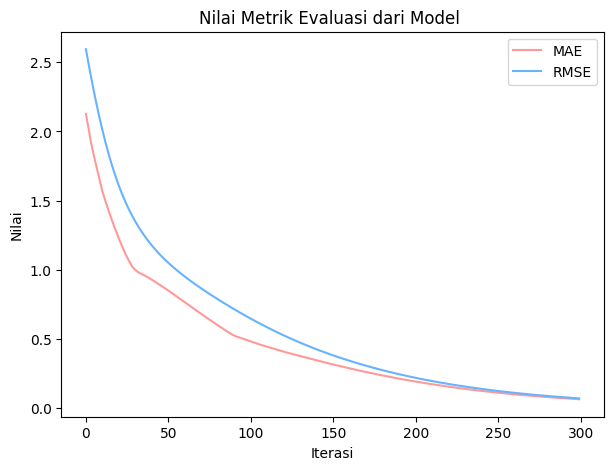

In [91]:
RS._plot_metric()

###Data

In [ ]:
#Separate train-test dataset

mainRS = RecommenderSystem(df_ratings_train, df_ratings_test)
P, Q = mainRS._matrix_factorization(30, 10, 0.007, 0.05)

init: success!

Enter getIndexTest function...
pivoting: success!
getIndex: success!
Define new list: success!


<ipython-input-82-927372325dc9>:33: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  err = rating[user,item] - np.dot(P[user,:], Q[:,item])


Epoch 1/30 - RMSE: 2.8851703827557875, MAE: 2.3914140529666996 | RMSE_test: 3.8235489845560378, MAE_test: 3.4159496235589524
update error: success!
Epoch 2/30 - RMSE: 1.5012414482842775, MAE: 1.1294815905053597 | RMSE_test: 1.97256145425737, MAE_test: 1.47278942157622
update error: success!
Epoch 3/30 - RMSE: 1.196407163854376, MAE: 0.9124530597646311 | RMSE_test: 1.5573186787524598, MAE_test: 1.1512111253582455
update error: success!
Epoch 4/30 - RMSE: 1.0757266496158004, MAE: 0.830677994020839 | RMSE_test: 1.3870972523238811, MAE_test: 1.0309177863909147
update error: success!
Epoch 5/30 - RMSE: 1.0132553400513489, MAE: 0.7886767067001228 | RMSE_test: 1.2954978639588426, MAE_test: 0.968791156088986
update error: success!
Epoch 6/30 - RMSE: 0.975762030301318, MAE: 0.7632560055935417 | RMSE_test: 1.2387266353090052, MAE_test: 0.9316284706571902
update error: success!
Epoch 7/30 - RMSE: 0.9510248394124996, MAE: 0.7461763389303615 | RMSE_test: 1.2003182485557766, MAE_test: 0.906932264379

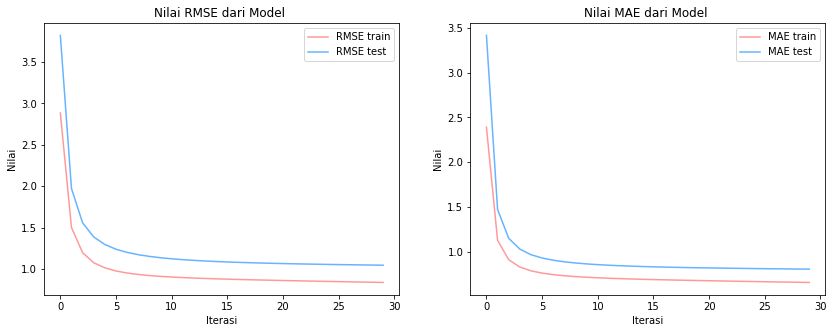

In [ ]:
mainRS._plot_metric()

###Tuning Hyperparameter

In [ ]:
import shutil

In [ ]:
#Mount it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
output_PATH = '/content/drive/MyDrive/Skripsi/output'

In [ ]:
def update_model_record(records, model, seed, k, alpha, λ, object_var):
    #old_update_method
    """
    records['model'].append(f'model_{model}')
    records['seed'].append(seed)
    records['k'].append(k)
    records['alpha'].append(alpha)
    records['λ'].append(λ)
    records['epoch'].append(object_var.epochs)
    records['RMSE_train'].append(object_var.rmse_train_list[-1])
    records['RMSE_test'].append(object_var.rmse_test_list[-1])
    records['MAE_train'].append(object_var.mae_train_list[-1])
    records['MAE_test'].append(object_var.mae_test_list[-1])
    """

    #new_update_method
    new_record = {'model': f'model_{model}',
                  'seed': seed,
                  'k': k,
                  'alpha': alpha,
                  'λ': λ,
                  'epoch': object_var.epochs,
                  'RMSE_train': object_var.rmse_train_list[-1],
                  'RMSE_test': object_var.rmse_test_list[-1],
                  'MAE_train': object_var.mae_train_list[-1],
                  'MAE_test': object_var.mae_test_list[-1]}
    records.append(new_record)

    return records

def save_output(model, P, Q, object_var):
    with open(f'model_{model}.npy', 'wb') as f:
        np.save(f, P)
        np.save(f, Q)
        np.save(f, object_var.rmse_train_list)
        np.save(f, object_var.rmse_test_list)
        np.save(f, object_var.mae_train_list)
        np.save(f, object_var.mae_train_list)

    object_var._plot_metric(model)

In [ ]:
#old_model_record
"""
model_record = {'model': [],
                'seed': [],
                'k': [],
                'alpha': [],
                'λ': [],
                'epoch': [],
                'RMSE_train': [],
                'RMSE_test': [],
                'MAE_train': [],
                'MAE_test': []}
"""

#new_model_record
model_record = []

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
### Use it if u forget to save your last model record

for model, figure in zip(os.listdir(output_PATH+'/model'), os.listdir(output_PATH+'/figure')):
    if model == 'old' or model[:-4] in temp_dataframe['model'].values:
        continue

    with open(f'{output_PATH}/model/{model}', 'rb') as f:
        P_hat = np.load(f)
        Q_hat = np.load(f)
        rmse_train = np.load(f)
        rmse_test = np.load(f)
        mae_train = np.load(f)
        mae_test = np.load(f)

    hyperparameter = figure.split('_')

    info_dict = {'model': model[:-4],
                  'seed': hyperparameter[2],
                  'k': hyperparameter[3],
                  'alpha': hyperparameter[4],
                  'λ': hyperparameter[5][:-4],
                  'epoch': len(rmse_train),
                  'RMSE_train': rmse_train[-1],
                  'RMSE_test': rmse_test[-1],
                  'MAE_train': mae_train[-1],
                  'MAE_test': mae_test[-1]}

    model_record.append(info_dict)
    print(f'Update {hyperparameter[1]} Success!')

#temp_dataframe = pd.DataFrame(model_record)
#temp_dataframe.to_csv(f'{output_PATH}/model_record.csv', index=False)

Update Model-350 Success!
Update Model-351 Success!
Update Model-352 Success!
Update Model-353 Success!


In [ ]:
temp_dataframe = pd.read_csv(f'{output_PATH}/model_record.csv')
temp_dataframe

In [ ]:
model_record = temp_dataframe.to_dict('records')

In [ ]:
seed_list = [0, 1, 2]
k_list = [3, 5, 7, 9, 11]
alpha_list = [0.01, 0.0075, 0.005, 0.0025, 0.001] #NaN: 0.1, 0.05
λ_list = [0, 0.005, 0.01, 0.05, 0.1]

Training model 0 skipped.
Training model 1 skipped.
Training model 2 skipped.
Training model 3 skipped.
Training model 4 skipped.
New records updated!
Training model 5 skipped.
Training model 6 skipped.
Training model 7 skipped.
Training model 8 skipped.
Training model 9 skipped.
New records updated!
Training model 10 skipped.
Training model 11 skipped.
Training model 12 skipped.
Training model 13 skipped.
Training model 14 skipped.
New records updated!
Training model 15 skipped.
Training model 16 skipped.
Training model 17 skipped.
Training model 18 skipped.
Training model 19 skipped.
New records updated!
Training model 20 skipped.
Training model 21 skipped.
Training model 22 skipped.
Training model 23 skipped.
Training model 24 skipped.
New records updated!
Training model 25 skipped.
Training model 26 skipped.
Training model 27 skipped.
Training model 28 skipped.
Training model 29 skipped.
New records updated!
Training model 30 skipped.
Training model 31 skipped.
Training model 32 sk

<ipython-input-29-927372325dc9>:33: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  err = rating[user,item] - np.dot(P[user,:], Q[:,item])


Streaming output truncated to the last 5000 lines.
Epoch 1447/3000 - RMSE: 0.6908024177655637, MAE: 0.5434931080330824 | RMSE_test: 1.0004370482411233, MAE_test: 0.7750156553228249
update error: success!
Epoch 1448/3000 - RMSE: 0.6907804596250605, MAE: 0.5434740119675586 | RMSE_test: 1.0004325618527643, MAE_test: 0.775014628152966
update error: success!
Epoch 1449/3000 - RMSE: 0.6907585316866365, MAE: 0.5434549476435253 | RMSE_test: 1.0004280804803336, MAE_test: 0.7750136724903122
update error: success!
Epoch 1450/3000 - RMSE: 0.6907366338996208, MAE: 0.5434359265910408 | RMSE_test: 1.0004236041021068, MAE_test: 0.7750126836941172
update error: success!
Epoch 1451/3000 - RMSE: 0.6907147662134682, MAE: 0.543416928857101 | RMSE_test: 1.000419132696446, MAE_test: 0.7750117164866851
update error: success!
Epoch 1452/3000 - RMSE: 0.6906929285777484, MAE: 0.5433979492208117 | RMSE_test: 1.000414666241805, MAE_test: 0.7750108866360494
update error: success!
Epoch 1453/3000 - RMSE: 0.690671120

<ipython-input-29-927372325dc9>:180: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))


New records updated!


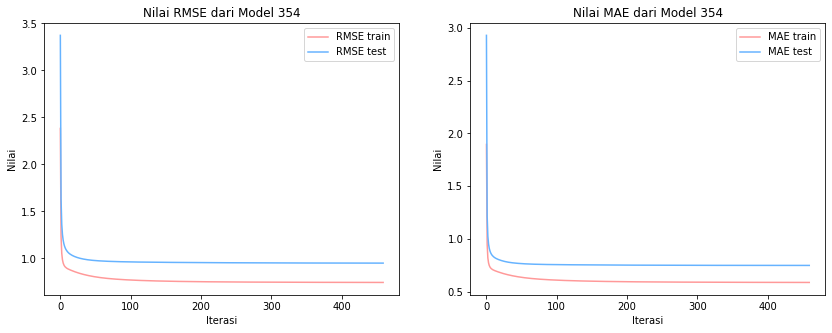

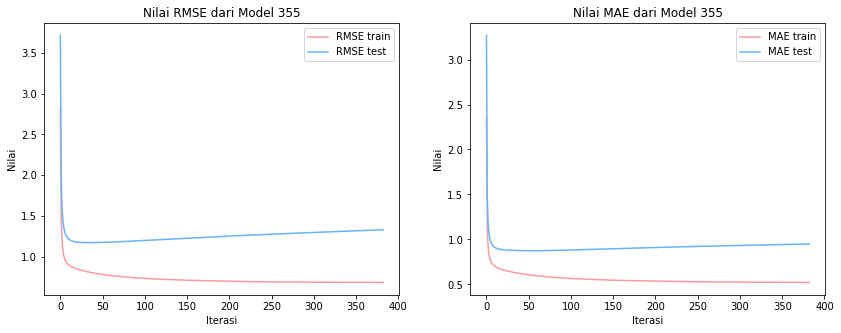

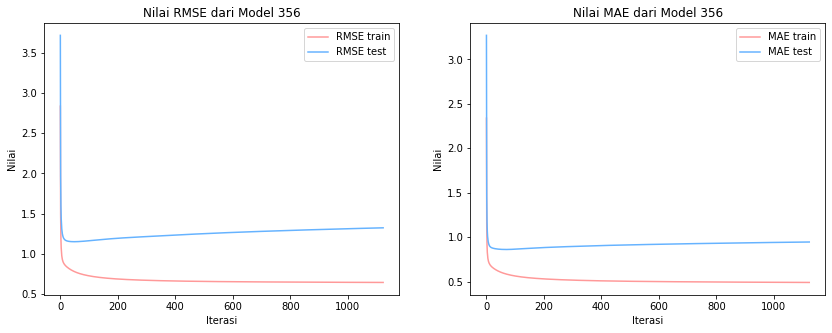

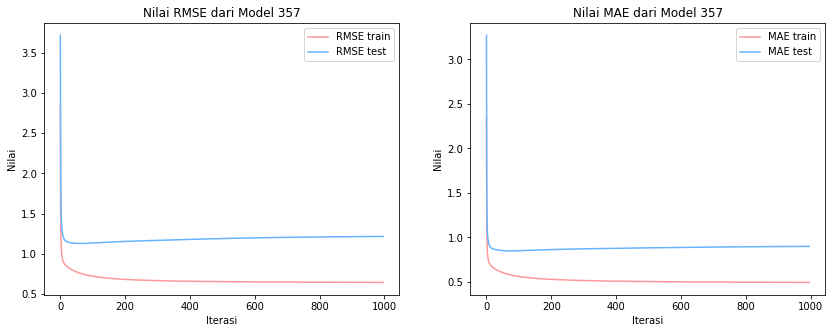

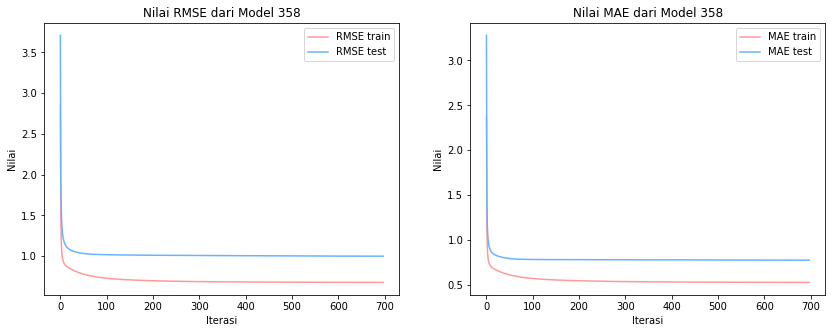

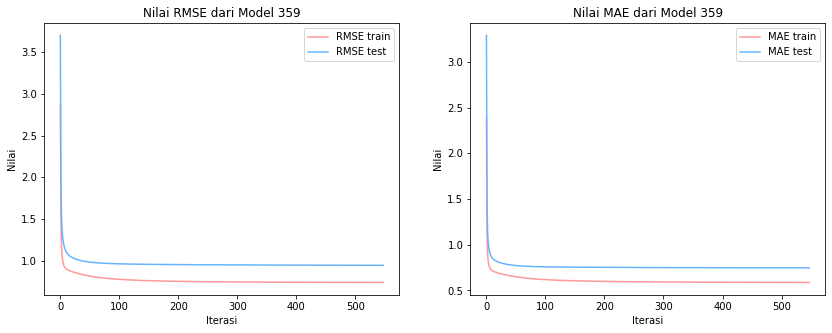

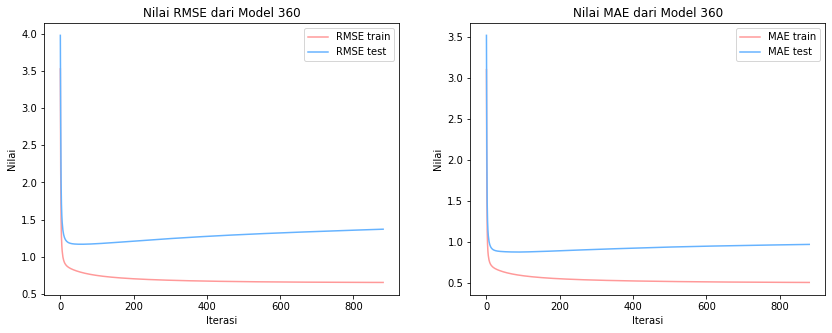

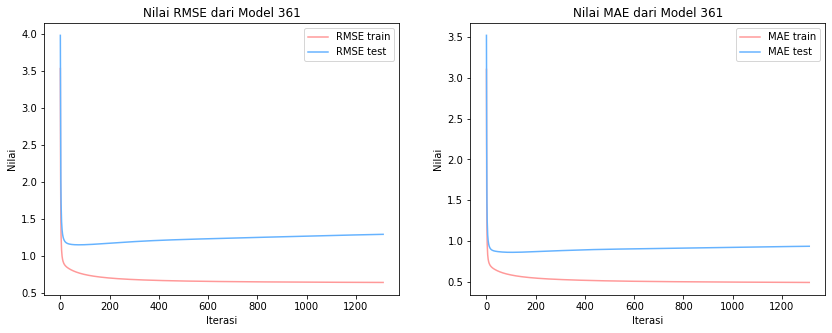

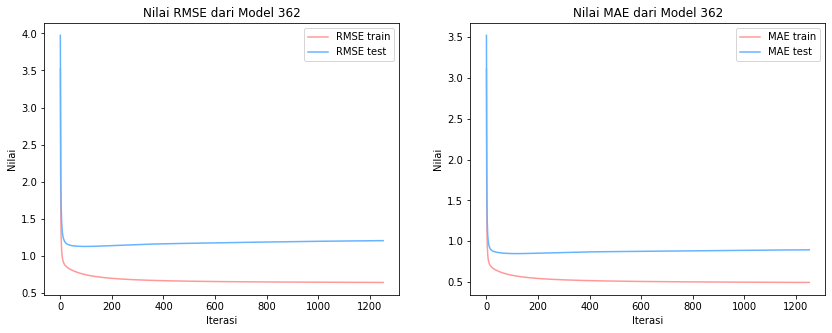

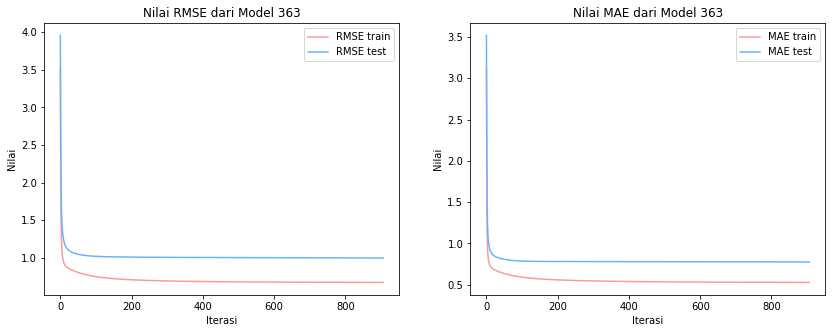

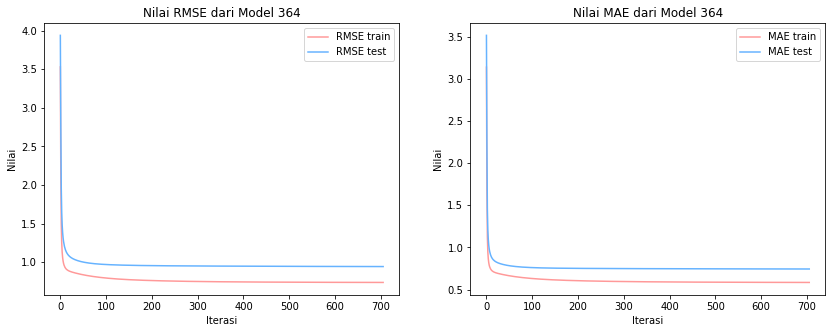

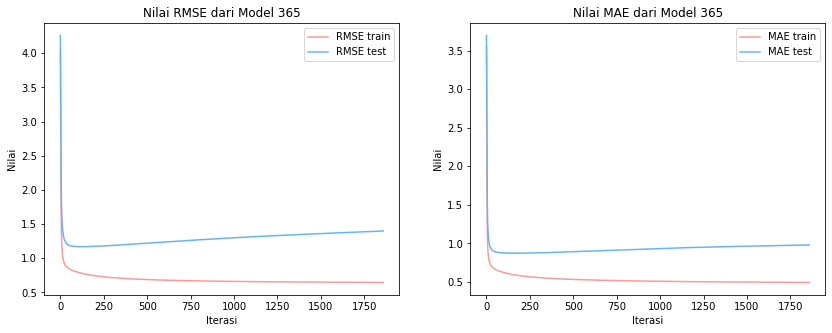

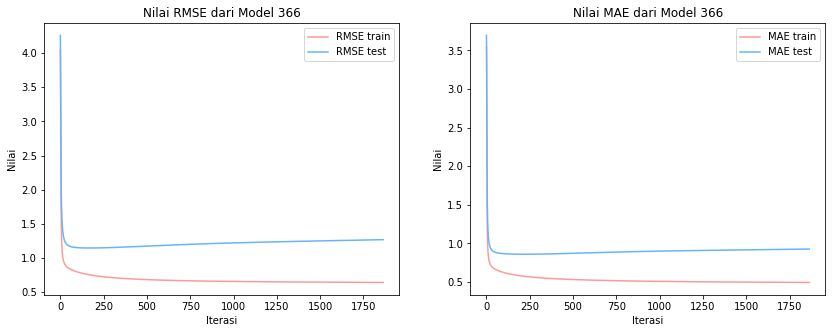

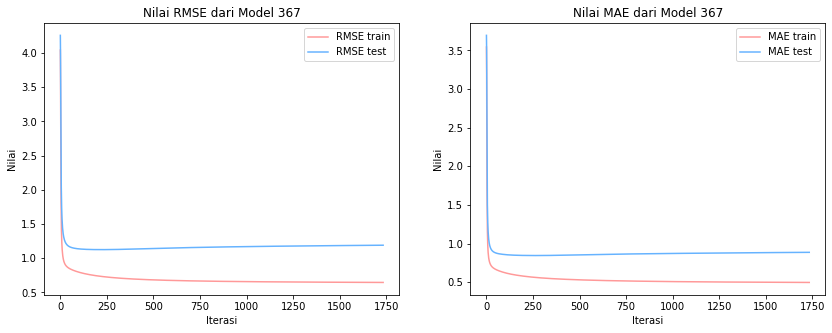

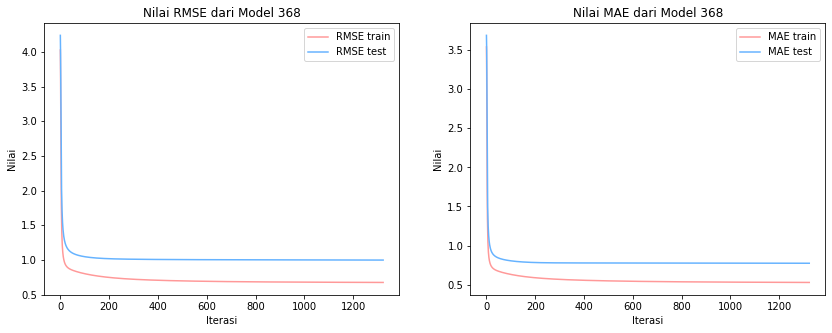

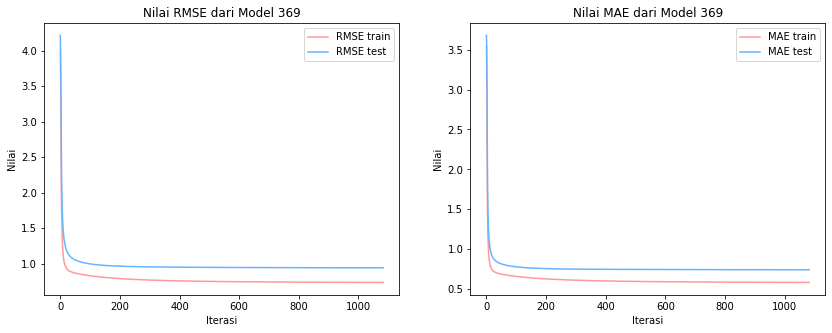

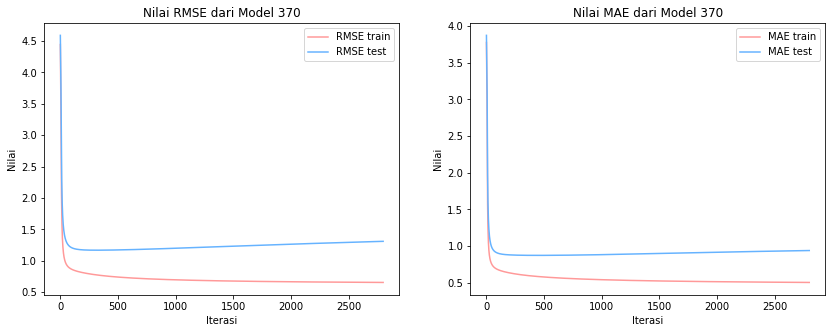

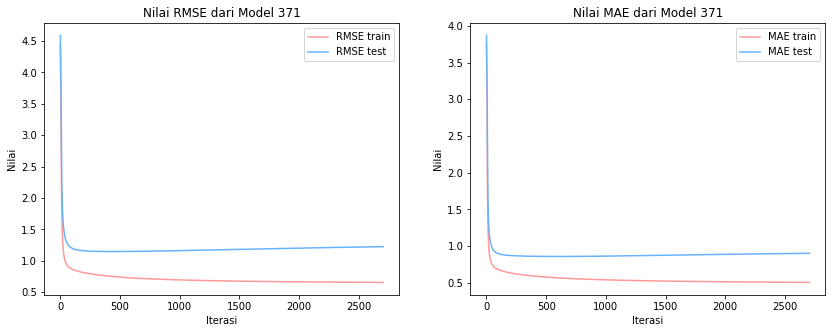

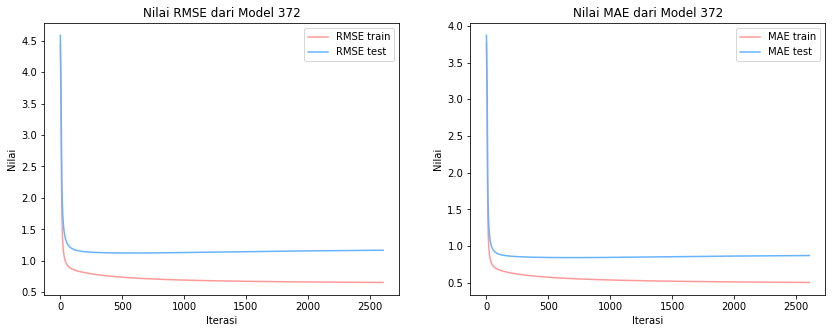

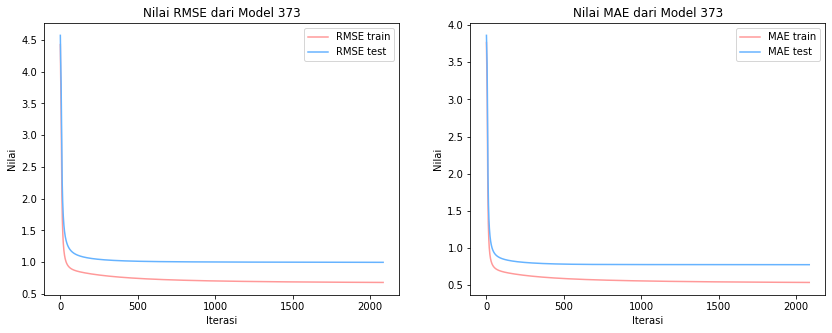

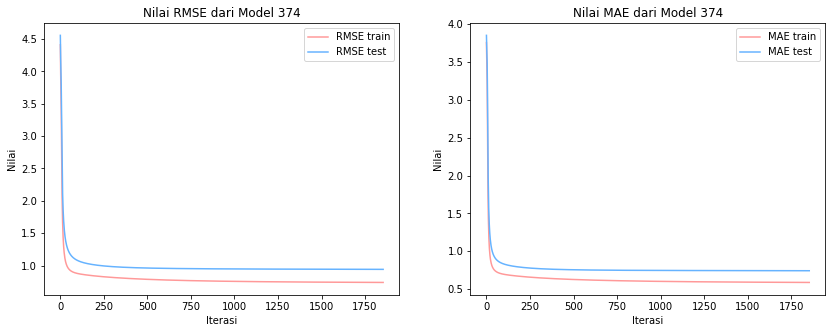

In [ ]:
epoch = 3000
idx = 0

checkpoint = len(model_record)

for seed in seed_list:
    for k in k_list:
        for alpha in alpha_list:
            for λ in λ_list:
                if idx < checkpoint:
                    print(f'Training model {idx} skipped.')
                    idx += 1
                    continue

                print(f'Training ke-{idx} ...')
                print(f'Hyperparameter:')
                print(f'seed\t: {seed}')
                print(f'k\t: {k}')
                print(f'alpha\t: {alpha}')
                print(f'λ\t: {λ}')

                mainRS = RecommenderSystem(df_ratings_train, df_ratings_test, seed)
                P, Q = mainRS._matrix_factorization(epoch, k, alpha, λ)

                model_record = update_model_record(model_record, idx, seed, k, alpha, λ, mainRS)
                save_output(idx, P, Q, mainRS)

                shutil.move(f'model_{idx}.npy', f"{output_PATH}/model/model_{idx}.npy")
                shutil.move(f'fig_Model-{idx}_{seed}_{k}_{alpha}_{λ}.png', f"{output_PATH}/figure/fig_Model-{idx}_{seed}_{k}_{alpha}_{λ}.png")

                idx += 1

            temp_dataframe = pd.DataFrame(model_record)
            temp_dataframe.to_csv(f'{output_PATH}/model_record.csv', index=False)
            print('New records updated!')

In [ ]:
#@title tuning k
epoch = 1000
k_, alpha_, λ_, seed = 7, 0.01, 0, 0

i = 0 #fill it with last i value

for k in k_list:
    mainRS = RecommenderSystem(df_ratings_train, df_ratings_test, seed)
    P, Q = mainRS._matrix_factorization(epoch, k, alpha_, λ_)

    i += 1
    model_record = update_model_record(model_record, i, seed, k, alpha_, λ_, mainRS)
    save_output(i, P, Q, mainRS)

    shutil.move(f'model_{i}.npy', f"{output_PATH}/model/model_{i}.npy")
    shutil.move(f'fig_{seed}_{k}_{alpha_}_{λ_}.png', f"{output_PATH}/figure/fig_{seed}_{k}_{alpha_}_{λ_}.png")

temp_dataframe = pd.DataFrame(model_record)
temp_dataframe.to_csv(f'{output_PATH}/model_record.csv', index=False)

In [ ]:
#@title tuning alpha
epoch = 1000
k_, alpha_, λ_, seed = 7, 0.01, 0, 0

i = 5 #fill it with last i value

for alpha in alpha_list:
    mainRS = RecommenderSystem(df_ratings_train, df_ratings_test, seed)
    P, Q = mainRS._matrix_factorization(epoch, k_, alpha, λ_)

    i += 1
    model_record = update_model_record(model_record, i, seed, k_, alpha, λ_, mainRS)
    save_output(i, P, Q, mainRS)

    shutil.move(f'model_{i}.npy', f"{output_PATH}/model/model_{i}.npy")
    shutil.move(f'fig_{seed}_{k_}_{alpha}_{λ_}.png', f"{output_PATH}/figure/fig_{seed}_{k_}_{alpha}_{λ_}.png")

temp_dataframe = pd.DataFrame(model_record)
temp_dataframe.to_csv(f'{output_PATH}/model_record.csv', index=False)

In [ ]:
#@title tuning λ
epoch = 1000
k_, alpha_, λ_, seed = 7, 0.01, 0, 0

i = 10

for λ in λ_list:
    mainRS = RecommenderSystem(df_ratings_train, df_ratings_test, seed)
    P, Q = mainRS._matrix_factorization(epoch, k_, alpha_, λ)

    i += 1
    model_record = update_model_record(model_record, i, seed, k_, alpha_, λ, mainRS)
    save_output(i, P, Q, mainRS)

    shutil.move(f'model_{i}.npy', f"{output_PATH}/model/model_{i}.npy")
    shutil.move(f'fig_{seed}_{k_}_{alpha_}_{λ}.png', f"{output_PATH}/figure/fig_{seed}_{k_}_{alpha_}_{λ}.png")

temp_dataframe = pd.DataFrame(model_record)
temp_dataframe.to_csv(f'{output_PATH}/model_record.csv', index=False)

In [ ]:
#@title different initial P, Q
epoch = 1000
k_, alpha_, λ_, seed = 7, 0.01, 0, 0

i = 15

for seed in seed_list:
    mainRS = RecommenderSystem(df_ratings_train, df_ratings_test, seed)
    P, Q = mainRS._matrix_factorization(epoch, k_, alpha_, λ_)

    i += 1
    model_record = update_model_record(model_record, i, seed, k_, alpha_, λ_, mainRS)
    save_output(i, P, Q, mainRS)

    shutil.move(f'model_{i}.npy', f"{output_PATH}/model/model_{i}.npy")
    shutil.move(f'fig_{seed}_{k_}_{alpha_}_{λ_}.png', f"{output_PATH}/figure/fig_{seed}_{k_}_{alpha_}_{λ_}.png")

temp_dataframe = pd.DataFrame(model_record)
temp_dataframe.to_csv(f'{output_PATH}/model_record.csv', index=False)

In [ ]:
temp_dataframe

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test
0,model_0,0,7,0.0100,0.000,159,0.774559,1.108677,0.603926,0.833442
1,model_1,0,3,0.0100,0.000,112,0.864295,0.992002,0.677411,0.767376
2,model_2,0,5,0.0100,0.000,138,0.816049,1.032325,0.636231,0.788752
3,model_3,0,7,0.0100,0.000,159,0.774559,1.108677,0.603926,0.833442
4,model_4,0,9,0.0100,0.000,160,0.749096,1.175216,0.580146,0.875124
5,model_5,0,11,0.0100,0.000,172,0.713371,1.253878,0.549490,0.926680
6,model_6,0,7,0.0250,0.000,7,2.553586,1.642415,0.954404,1.009820
7,model_7,0,7,0.0125,0.000,88,0.800398,1.107810,0.624077,0.836993
8,model_8,0,7,0.0100,0.000,159,0.774559,1.108677,0.603926,0.833442
9,model_9,0,7,0.0050,0.000,662,0.735068,1.110925,0.571208,0.829050


In [ ]:
temp_dataframe[(temp_dataframe['k'] == 7) & (temp_dataframe['alpha'] == 0.01)]

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test
0,model_0,0,7,0.01,0.000,159,0.774559,1.108677,0.603926,0.833442
3,model_3,0,7,0.01,0.000,159,0.774559,1.108677,0.603926,0.833442
8,model_8,0,7,0.01,0.000,159,0.774559,1.108677,0.603926,0.833442
11,model_11,0,7,0.01,0.000,159,0.774559,1.108677,0.603926,0.833442
12,model_12,0,7,0.01,0.005,683,0.739132,1.150384,0.572996,0.847765
13,model_13,0,7,0.01,0.010,675,0.733166,1.104740,0.569333,0.825582
14,model_14,0,7,0.01,0.050,463,0.750192,0.974024,0.589185,0.758004
15,model_15,0,7,0.01,0.100,418,0.789211,0.943429,0.626215,0.744721


In [ ]:
model_dataframe = pd.DataFrame(model_record)
model_dataframe

,model,seed,k,alpha,λ,epoch,RMSE_test,MAE_test
0,model_1,0,5,0.01,0,5,1.123422,0.860134
1,model_1,1,5,0.01,0,5,1.118672,0.858239
2,model_1,2,5,0.01,0,5,1.129195,0.864924
3,model_1,3,5,0.01,0,5,1.129684,0.863188
4,model_1,4,5,0.01,0,5,1.112511,0.853806


In [ ]:
model_dataframe = pd.DataFrame(model_record)
model_dataframe

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test
0,model_1,0,5,0.01,0,5,0.983525,1.123422,0.767332,0.860134
1,model_1,1,5,0.01,0,5,0.978752,1.118672,0.764855,0.858239
2,model_1,2,5,0.01,0,5,0.983224,1.129195,0.768114,0.864924
3,model_1,3,5,0.01,0,5,0.981209,1.129684,0.764884,0.863188
4,model_1,4,5,0.01,0,5,0.983964,1.112511,0.766610,0.853806


In [ ]:
with open('test.npy', 'wb') as f:
    np.save(f, P)
    np.save(f, Q)
    np.save(f, mainRS.rmse_train_list)
    np.save(f, mainRS.rmse_test_list)
    np.save(f, mainRS.mae_train_list)
    np.save(f, mainRS.mae_train_list)

In [ ]:
with open(f'{output_PATH}/model/model_6.npy', 'rb') as f:
    P_hat = np.load(f)
    Q_hat = np.load(f)
    rmse_train = np.load(f)
    rmse_test = np.load(f)
    mae_train = np.load(f)
    mae_test = np.load(f)

In [ ]:
P_hat

array([[ 0.26667209, -0.51184673, -1.31123451, -0.05952003, -0.00164418],
       [ 0.08647642, -0.44249369, -1.300316  ,  0.00294064,  0.93070332],
       [ 1.39484498, -0.10487071, -1.25558643, -0.2801829 ,  0.61674657],
       ...,
       [ 0.91615673, -0.82196132, -1.17676448, -0.07923454,  0.97483723],
       [ 0.57390553, -1.11182031, -0.99447504,  0.01555292,  0.18220858],
       [ 0.28157199, -0.31319887, -1.31755424,  0.76654128, -0.37245439]])

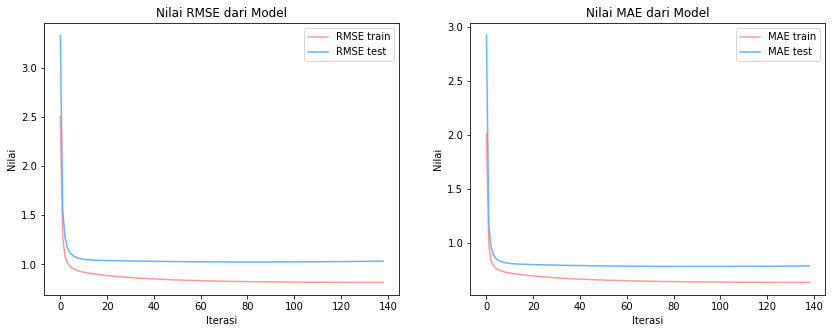

In [ ]:
mainRS._plot_metric()

##Analysis

In [37]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
#Mount it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
output_PATH = '/content/drive/MyDrive/Skripsi/output'

In [40]:
temp_dataframe = pd.read_csv(f'{output_PATH}/model_record.csv')

In [41]:
temp_dataframe

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test
0,model_0,0,3,0.010,0.000,113,0.864295,0.992002,0.677411,0.677411
1,model_1,0,3,0.010,0.005,195,0.853921,0.986296,0.668811,0.668811
2,model_2,0,3,0.010,0.010,304,0.847611,0.981971,0.663693,0.663693
3,model_3,0,3,0.010,0.050,288,0.849004,0.956387,0.668646,0.668646
4,model_4,0,3,0.010,0.100,257,0.863996,0.949753,0.685616,0.685616
...,...,...,...,...,...,...,...,...,...,...
370,model_370,2,11,0.001,0.000,2801,0.656011,1.310693,0.504536,0.939435
371,model_371,2,11,0.001,0.005,2704,0.653822,1.223104,0.504235,0.901191
372,model_372,2,11,0.001,0.010,2610,0.654160,1.166947,0.505666,0.871954
373,model_373,2,11,0.001,0.050,2085,0.681267,0.998130,0.534868,0.774035


In [97]:
#Function to plot

def plot_analyze(df, variation, metric = 'RMSE'):
    """
    Args:
        df: dataframe
        variation: seed/k/alpha/λ
        metric: RMSE/MAE
    """
    x, y1, y2 = [str(i) for i in df[variation]], df[f'{metric}_train'], df[f'{metric}_test']

    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

    axes[0].plot(x, y1, c='#ff9999', label=f'{metric} latih', marker = 'o')
    #axes[0].plot(self.rmse_test_list, c='#66b3ff', label='RMSE test')

    axes[1].plot(x, y2, c='#66b3ff', label=f'{metric} uji', marker = 'o')
    #axes[1].plot(self.mae_test_list, c='#66b3ff', label='MAE test')

    denominator = 75
    multiply = 8
    delta_x = (df[variation].max() - df[variation].min()) / 100
    delta_y1 = (df[f'{metric}_train'].max() - df[f'{metric}_train'].min()) / denominator
    delta_y2 = (df[f'{metric}_test'].max() - df[f'{metric}_test'].min()) / denominator

    for i, v in enumerate(df[f'{metric}_train'].values):
        axes[0].text(i + delta_x, v + delta_y1, str(round(v, 3)), color='black')#, fontweight='bold')

    for i, v in enumerate(df[f'{metric}_test'].values):
        axes[1].text(i + delta_x, v + delta_y2, str(round(v, 3)), color='black')#, fontweight='bold')
    #print(delta_x, df[variation].min(), df[variation].max())
    for i in range(2):
        axes[i].set_xlabel(variation)
        axes[i].set_ylabel(metric)
        #axes[i].set_xlim([df[variation].min() - 2*delta_x, df[variation].max() + 2*delta_x])
        axes[i].set_xlim([-0.3, 4.5])
        if i == 0:
            axes[i].set_ylim([df[f'{metric}_train'].min() - multiply*delta_y1, df[f'{metric}_train'].max() + multiply*delta_y1])
        else:
            axes[i].set_ylim([df[f'{metric}_test'].min() - multiply*delta_y2, df[f'{metric}_test'].max() + multiply*delta_y2])
        axes[i].legend()


    axes[0].title.set_text(f'Nilai {metric} latih pada variasi {variation}')
    axes[1].title.set_text(f'Nilai {metric} uji pada variasi {variation}')
    plt.savefig(f"analysis_ME_{variation}_transparent.png", transparent=True, bbox_inches='tight')

def epoch_analyze(df, variation):
    x = [str(i) for i in df[variation]]
    y = df['epoch']

    plt.plot(x, y, marker = 'o', c = '#2BA495')
    plt.title(f'Banyak iterasi pelatihan pada variasi {variation}')
    plt.xlabel(variation)
    plt.ylabel('Jumlah Iterasi')

    denominator = 75
    multiply = 8
    delta_x = (df[variation].max() - df[variation].min()) / 100
    delta_y = (df['epoch'].max() - df['epoch'].min()) / denominator

    for i, v in enumerate(df['epoch'].values):
        plt.text(i + delta_x, v + delta_y, str(round(v, 3)), color='black')#, fontweight='bold')

    plt.xlim([-0.3, 4.5])
    plt.ylim([df['epoch'].min() - multiply*delta_y, df['epoch'].max() + multiply*delta_y])
    plt.savefig(f"analysis_epoch_{variation}_transparent.png", transparent=True, bbox_inches='tight')

###Comparing $k$

In [99]:
temp_dataframe.query('seed == 0 and alpha == 0.01 and λ	 == 0')

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test
0,model_0,0,3,0.01,0.0,113,0.864295,0.992002,0.677411,0.677411
25,model_25,0,5,0.01,0.0,139,0.816049,1.032325,0.636231,0.636231
50,model_50,0,7,0.01,0.0,160,0.774559,1.108677,0.603926,0.603926
75,model_75,0,9,0.01,0.0,161,0.749096,1.175216,0.580146,0.875124
100,model_100,0,11,0.01,0.0,173,0.713371,1.253878,0.549490,0.926680


In [ ]:
temp_dataframe['λ'].value_counts()

0.000    75
0.005    75
0.010    75
0.050    75
0.100    75
Name: λ, dtype: int64

Text(0, 0.5, 'RMSE Latih')

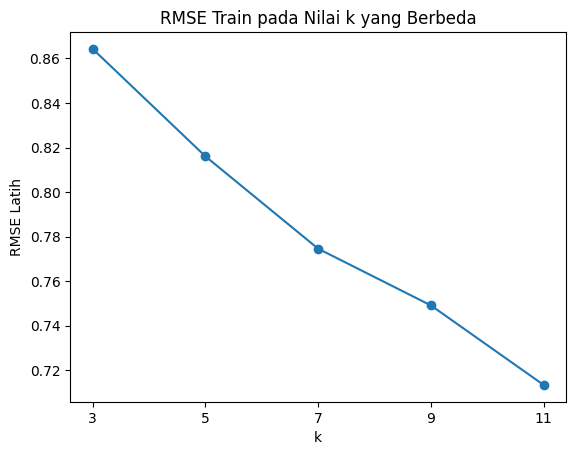

In [100]:
temp_df = temp_dataframe.query('seed == 0 and alpha == 0.01 and λ == 0')
x, y1, y2 = [str(i) for i in temp_df['k']], temp_df['RMSE_test'], temp_df['RMSE_train']
plt.plot(x, y2, marker = 'o')
plt.title('RMSE Train pada Nilai k yang Berbeda')
plt.xlabel('k')
plt.ylabel('RMSE Latih')
#plt.plot(x, y1)

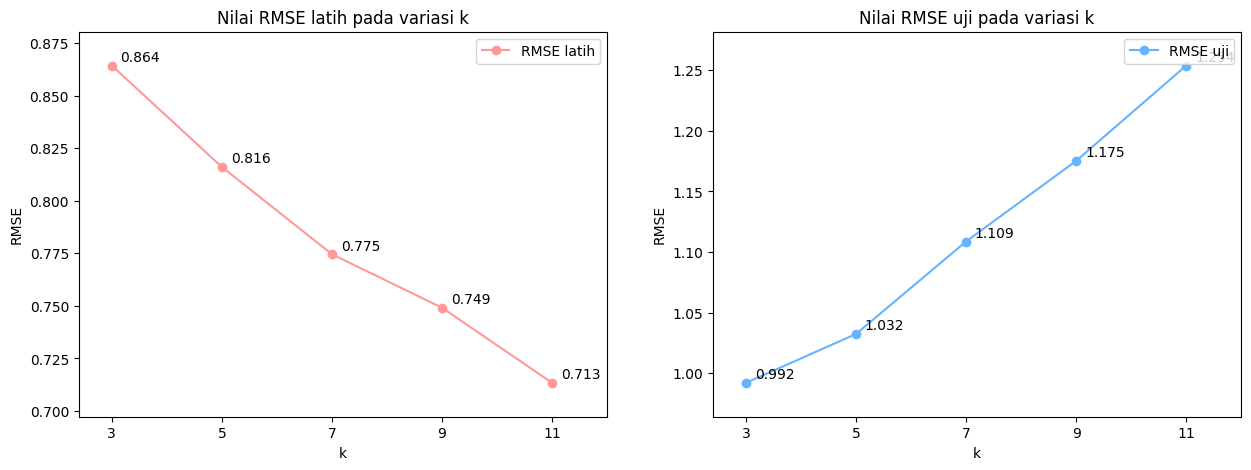

In [102]:
temp_df = temp_dataframe.query('seed == 0 and alpha == 0.01 and λ == 0')
plot_analyze(temp_df, 'k')

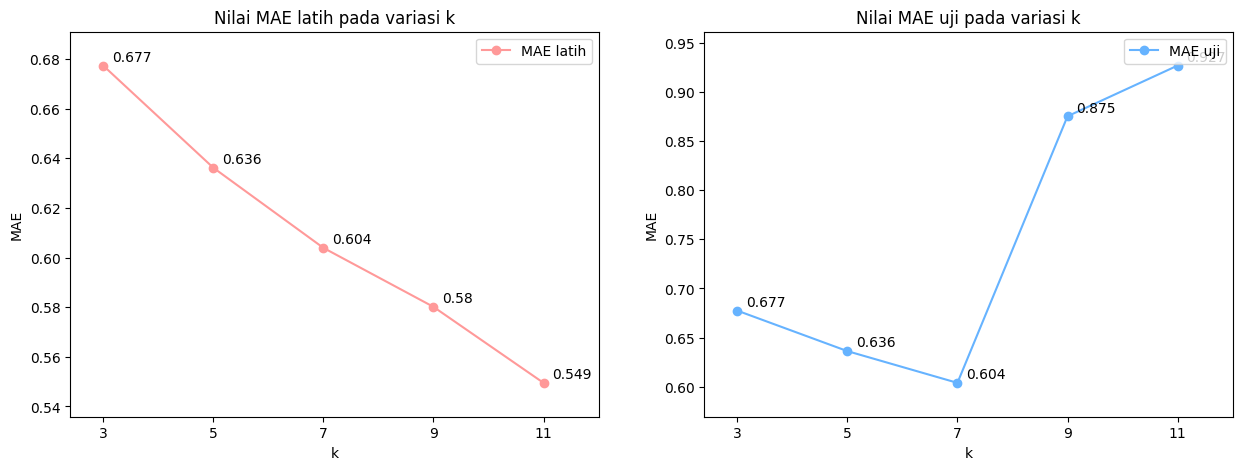

In [68]:
temp_df = temp_dataframe.query('seed == 0 and alpha == 0.01 and λ == 0')
plot_analyze(temp_df, 'k', "MAE")

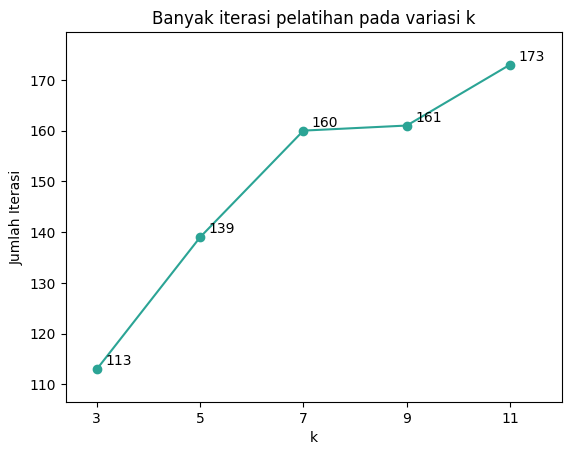

In [103]:
epoch_analyze(temp_df, 'k')

###Comparing alpha

In [104]:
temp_df = temp_dataframe.query('seed == 0 and k == 3 and λ == 0').sort_values(by='alpha')
temp_df

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test
20,model_20,0,3,0.0010,0.0,1290,0.832499,0.967279,0.653294,0.653294
15,model_15,0,3,0.0025,0.0,772,0.829569,0.970610,0.650264,0.650264
10,model_10,0,3,0.0050,0.0,363,0.837595,0.975552,0.656190,0.656190
5,model_5,0,3,0.0075,0.0,190,0.849898,0.982016,0.665956,0.665956
0,model_0,0,3,0.0100,0.0,113,0.864295,0.992002,0.677411,0.677411


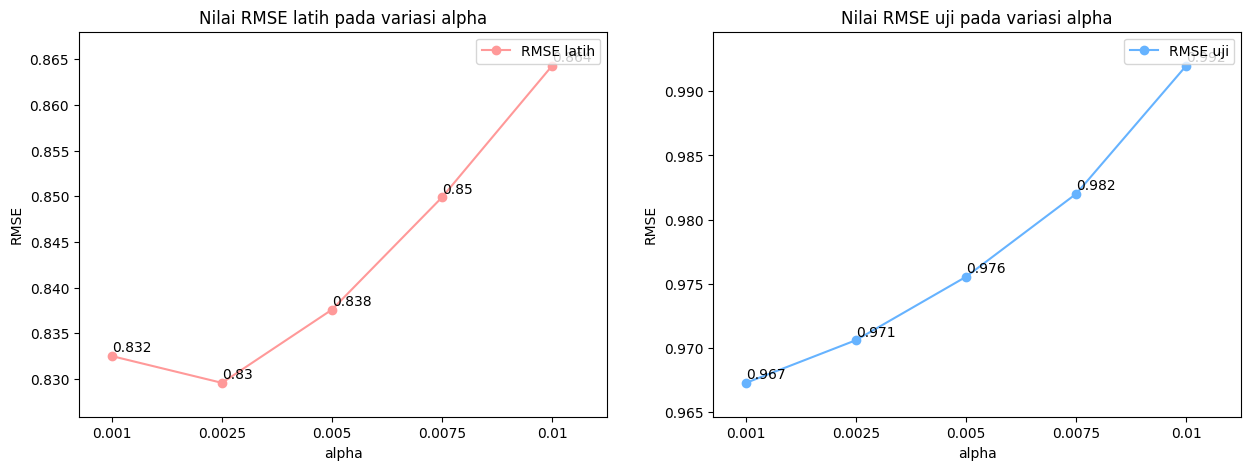

In [105]:
plot_analyze(temp_df, 'alpha')

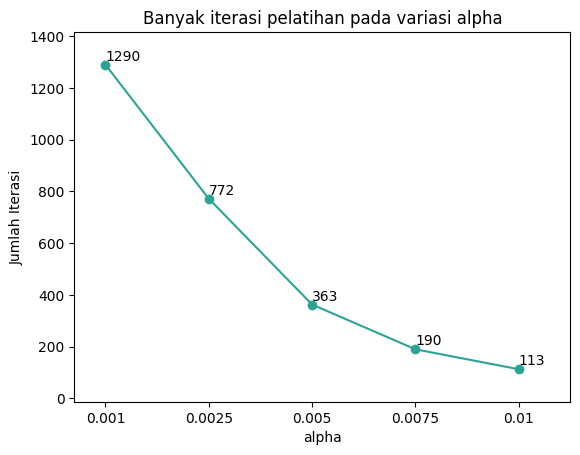

In [106]:
epoch_analyze(temp_df, 'alpha')

###Comparing $\lambda$

In [107]:
temp_df = temp_dataframe.query('seed == 0 and k == 11 and alpha == 0.01')
temp_df

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test
100,model_100,0,11,0.01,0.000,173,0.713371,1.253878,0.549490,0.926680
101,model_101,0,11,0.01,0.005,880,0.653220,1.328902,0.497532,0.954722
102,model_102,0,11,0.01,0.010,841,0.649958,1.205439,0.496784,0.896643
103,model_103,0,11,0.01,0.050,587,0.681353,0.996191,0.532151,0.774858
104,model_104,0,11,0.01,0.100,511,0.744336,0.949759,0.590037,0.749802


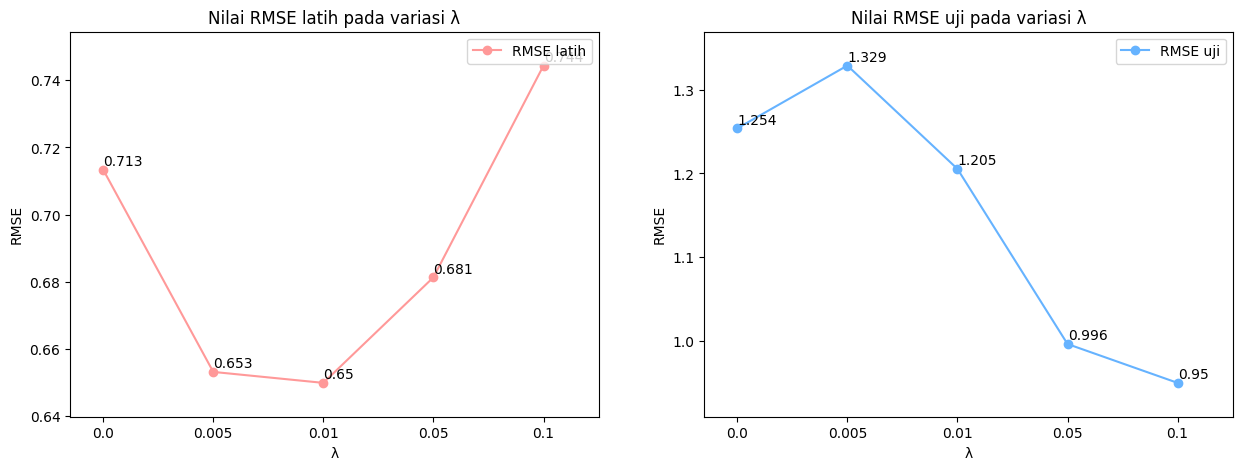

In [108]:
plot_analyze(temp_df, 'λ')

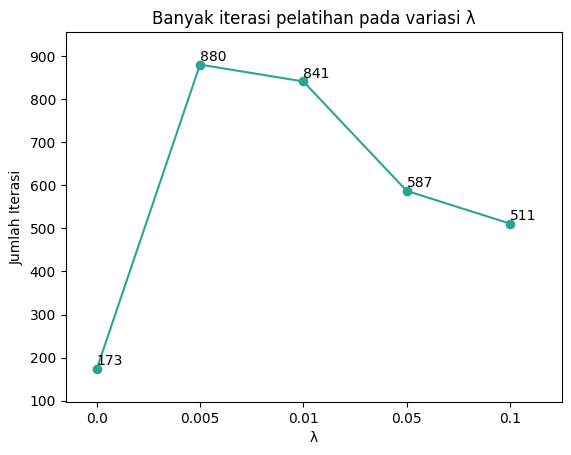

In [109]:
epoch_analyze(temp_df, 'λ')

In [ ]:
temp_df['RMSE_test'] - temp_df['RMSE_train']

0    0.127706
1    0.132375
2    0.134360
3    0.107382
4    0.085758
dtype: float64

###Best Model

In [ ]:
best_models = temp_dataframe.copy()
best_models['rmse_gap'] = best_models['RMSE_test'] - best_models['RMSE_train']
best_models

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test,rmse_gap
0,model_0,0,3,0.010,0.000,113,0.864295,0.992002,0.677411,0.677411,0.127706
1,model_1,0,3,0.010,0.005,195,0.853921,0.986296,0.668811,0.668811,0.132375
2,model_2,0,3,0.010,0.010,304,0.847611,0.981971,0.663693,0.663693,0.134360
3,model_3,0,3,0.010,0.050,288,0.849004,0.956387,0.668646,0.668646,0.107382
4,model_4,0,3,0.010,0.100,257,0.863996,0.949753,0.685616,0.685616,0.085758
...,...,...,...,...,...,...,...,...,...,...,...
370,model_370,2,11,0.001,0.000,2801,0.656011,1.310693,0.504536,0.939435,0.654682
371,model_371,2,11,0.001,0.005,2704,0.653822,1.223104,0.504235,0.901191,0.569282
372,model_372,2,11,0.001,0.010,2610,0.654160,1.166947,0.505666,0.871954,0.512787
373,model_373,2,11,0.001,0.050,2085,0.681267,0.998130,0.534868,0.774035,0.316864


In [ ]:
best_models.query('rmse_gap < 0.1').sort_values(by=['RMSE_test', 'epoch'])[:10]

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test,rmse_gap
19,model_19,0,3,0.0025,0.1,586,0.847410,0.933595,0.673918,0.673918,0.086185
24,model_24,0,3,0.0010,0.1,1069,0.847830,0.933814,0.675092,0.675092,0.085985
269,model_269,2,3,0.0025,0.1,794,0.847761,0.935680,0.674020,0.737524,0.087919
149,model_149,1,3,0.0010,0.1,1050,0.851323,0.935722,0.677361,0.739702,0.084398
144,model_144,1,3,0.0025,0.1,661,0.849639,0.936826,0.675617,0.740334,0.087187
14,model_14,0,3,0.0050,0.1,376,0.851774,0.937956,0.676646,0.676646,0.086182
264,model_264,2,3,0.0050,0.1,486,0.851650,0.938156,0.676577,0.739785,0.086506
274,model_274,2,3,0.0010,0.1,1347,0.850299,0.939249,0.676678,0.739857,0.088950
139,model_139,1,3,0.0050,0.1,497,0.852770,0.939570,0.677911,0.742470,0.086800
259,model_259,2,3,0.0075,0.1,365,0.857568,0.943354,0.680965,0.744060,0.085786


In [ ]:
best_models.sort_values(by=['RMSE_test', 'epoch'])[:10]

In [ ]:
#addition
best_models.query('rmse_gap < 0.1 and seed == 2').sort_values(by=['RMSE_test', 'epoch'])[:10]

,model,seed,k,alpha,λ,epoch,RMSE_train,RMSE_test,MAE_train,MAE_test,rmse_gap
269,model_269,2,3,0.0025,0.1,794,0.847761,0.935680,0.674020,0.737524,0.087919
264,model_264,2,3,0.0050,0.1,486,0.851650,0.938156,0.676577,0.739785,0.086506
274,model_274,2,3,0.0010,0.1,1347,0.850299,0.939249,0.676678,0.739857,0.088950
259,model_259,2,3,0.0075,0.1,365,0.857568,0.943354,0.680965,0.744060,0.085786
254,model_254,2,3,0.0100,0.1,296,0.863927,0.949366,0.685730,0.749031,0.085439


##Recommendation

In [ ]:
import shutil

In [ ]:
#Mount it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Function

class Recommender:
    def __init__(self, dataset_rating, dataset_info, model_path: str):
        """
        Args:
            model_path:
        """
        self.dataset = dataset_rating.pivot(index='userId', columns='movieId', values='rating').fillna(0)
        self.info = dataset_info
        with open(model_path, 'rb') as f:
            P_hat = np.load(f)
            Q_hat = np.load(f)
        self.R_hat = pd.DataFrame(np.dot(P_hat, Q_hat))
        self.R_hat.index, self.R_hat.columns = self.dataset.index, self.dataset.columns
        #print('Success')

    def _find(self, user: int, n_items: int, n_liked = 10):
        #print('Success')
        rec_list = self.R_hat.loc[user].sort_values(ascending=False)
        n_rec_list = []

        #print('Success')
        for item in rec_list.index:
            if self.dataset.loc[user, item] == 0:
                n_rec_list.append(self.info[self.info['movie id'] == item]['movie title'].values[0])

            if len(n_rec_list) == n_items:
                break

        #print('Success')
        print(f'{n_liked} film yang kamu suka: ')
        print('----------------------------')
        for number, item in enumerate(self.dataset.loc[user].sort_values(ascending=False).index[:n_liked]):
            movie = self.info[self.info['movie id'] == item]['movie title'].values[0]
            print(f'{number+1}. {movie}')
        print('----------------------------\n\n')

        print(f'{n_items} film yang mungkin kamu suka: ')
        print('----------------------------')
        for number, item in enumerate(n_rec_list):
            print(f'{number+1}. {item}')
        print('----------------------------')

In [ ]:
output_PATH = '/content/drive/MyDrive/Skripsi/output'
model = 'model_19.npy'
model_PATH = f'{output_PATH}/model/{model}'

In [ ]:
Rec = Recommender(df_ratings_train, df_genres_clean, model_PATH)
Rec._find(30, 10)

10 film yang kamu suka: 
----------------------------
1. Raiders of the Lost Ark (1981)
2. Contact (1997)
3. Forrest Gump (1994)
4. Kolya (1996)
5. Titanic (1997)
6. 2001: A Space Odyssey (1968)
7. Flubber (1997)
8. Men in Black (1997)
9. Top Gun (1986)
10. George of the Jungle (1997)
----------------------------


10 film yang mungkin kamu suka: 
----------------------------
1. Santa with Muscles (1996)
2. Faust (1994)
3. Big Bang Theory, The (1994)
4. Love and Death on Long Island (1997)
5. Saint of Fort Washington, The (1993)
6. Pather Panchali (1955)
7. Someone Else's America (1995)
8. Some Mother's Son (1996)
9. Gate of Heavenly Peace, The (1995)
10. Spanish Prisoner, The (1997)
----------------------------


In [ ]:
output_PATH = '/content/drive/MyDrive/Skripsi/output'
model = 'model_24.npy'
model_PATH = f'{output_PATH}/model/{model}'
Rec2 = Recommender(df_ratings_train, df_genres_clean, model_PATH)
Rec2._find(30, 10)

10 film yang kamu suka: 
----------------------------
1. Raiders of the Lost Ark (1981)
2. Contact (1997)
3. Forrest Gump (1994)
4. Kolya (1996)
5. Titanic (1997)
6. 2001: A Space Odyssey (1968)
7. Flubber (1997)
8. Men in Black (1997)
9. Top Gun (1986)
10. George of the Jungle (1997)
----------------------------


10 film yang mungkin kamu suka: 
----------------------------
1. Santa with Muscles (1996)
2. Faust (1994)
3. Saint of Fort Washington, The (1993)
4. Some Mother's Son (1996)
5. Someone Else's America (1995)
6. Pather Panchali (1955)
7. Safe (1995)
8. Love and Death on Long Island (1997)
9. Gate of Heavenly Peace, The (1995)
10. Bitter Sugar (Azucar Amargo) (1996)
----------------------------


In [ ]:
output_PATH = '/content/drive/MyDrive/Skripsi/output'
model = 'model_269.npy'
model_PATH = f'{output_PATH}/model/{model}'
Rec2 = Recommender(df_ratings_train, df_genres_clean, model_PATH)
Rec2._find(30, 10)

10 film yang kamu suka: 
----------------------------
1. Raiders of the Lost Ark (1981)
2. Contact (1997)
3. Forrest Gump (1994)
4. Kolya (1996)
5. Titanic (1997)
6. 2001: A Space Odyssey (1968)
7. Flubber (1997)
8. Men in Black (1997)
9. Top Gun (1986)
10. George of the Jungle (1997)
----------------------------


10 film yang mungkin kamu suka: 
----------------------------
1. Love and Death on Long Island (1997)
2. Some Mother's Son (1996)
3. Spanish Prisoner, The (1997)
4. Pather Panchali (1955)
5. They Made Me a Criminal (1939)
6. Nico Icon (1995)
7. Brothers in Trouble (1995)
8. Bitter Sugar (Azucar Amargo) (1996)
9. Object of My Affection, The (1998)
10. Someone Else's America (1995)
----------------------------


In [ ]:
#seed 2 = 264, 274, 259, 254
output_PATH = '/content/drive/MyDrive/Skripsi/output'
model = 'model_274.npy'
model_PATH = f'{output_PATH}/model/{model}'
Rec__ = Recommender(df_ratings_train, df_genres_clean, model_PATH)
Rec__._find(30, 10)

10 film yang kamu suka: 
----------------------------
1. Raiders of the Lost Ark (1981)
2. Contact (1997)
3. Forrest Gump (1994)
4. Kolya (1996)
5. Titanic (1997)
6. 2001: A Space Odyssey (1968)
7. Flubber (1997)
8. Men in Black (1997)
9. Top Gun (1986)
10. George of the Jungle (1997)
----------------------------


10 film yang mungkin kamu suka: 
----------------------------
1. Some Mother's Son (1996)
2. Pather Panchali (1955)
3. Spanish Prisoner, The (1997)
4. Someone Else's America (1995)
5. Nico Icon (1995)
6. Love and Death on Long Island (1997)
7. Gold Diggers: The Secret of Bear Mountain (1995)
8. They Made Me a Criminal (1939)
9. Bitter Sugar (Azucar Amargo) (1996)
10. Nelly & Monsieur Arnaud (1995)
----------------------------


In [ ]:
output_PATH = '/content/drive/MyDrive/Skripsi/output'
model = 'model_149.npy'
model_PATH = f'{output_PATH}/model/{model}'
Rec2 = Recommender(df_ratings_train, df_genres_clean, model_PATH)
Rec2._find(30, 10)

10 film yang kamu suka: 
----------------------------
1. Raiders of the Lost Ark (1981)
2. Contact (1997)
3. Forrest Gump (1994)
4. Kolya (1996)
5. Titanic (1997)
6. 2001: A Space Odyssey (1968)
7. Flubber (1997)
8. Men in Black (1997)
9. Top Gun (1986)
10. George of the Jungle (1997)
----------------------------


10 film yang mungkin kamu suka: 
----------------------------
1. Santa with Muscles (1996)
2. Saint of Fort Washington, The (1993)
3. Some Mother's Son (1996)
4. Two or Three Things I Know About Her (1966)
5. Someone Else's America (1995)
6. American Dream (1990)
7. Spanish Prisoner, The (1997)
8. Jupiter's Wife (1994)
9. Pather Panchali (1955)
10. Close Shave, A (1995)
----------------------------


In [ ]:
output_PATH = '/content/drive/MyDrive/Skripsi/output'
model = 'model_144.npy'
model_PATH = f'{output_PATH}/model/{model}'
Rec2 = Recommender(df_ratings_train, df_genres_clean, model_PATH)
Rec2._find(30, 10)

10 film yang kamu suka: 
----------------------------
1. Raiders of the Lost Ark (1981)
2. Contact (1997)
3. Forrest Gump (1994)
4. Kolya (1996)
5. Titanic (1997)
6. 2001: A Space Odyssey (1968)
7. Flubber (1997)
8. Men in Black (1997)
9. Top Gun (1986)
10. George of the Jungle (1997)
----------------------------


10 film yang mungkin kamu suka: 
----------------------------
1. Santa with Muscles (1996)
2. Saint of Fort Washington, The (1993)
3. Two or Three Things I Know About Her (1966)
4. Spanish Prisoner, The (1997)
5. American Dream (1990)
6. Love and Death on Long Island (1997)
7. Someone Else's America (1995)
8. Jupiter's Wife (1994)
9. Some Mother's Son (1996)
10. Pather Panchali (1955)
----------------------------


#MovieLens100K

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip -n ml-100k.zip

--2022-10-23 15:46:55--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  23.9MB/s    in 0.2s    

2022-10-23 15:46:55 (23.9 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [ ]:
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
overall_stats.head()

,0
0,943 users
1,1682 items
2,100000 ratings


In [ ]:
columns = ['userId', 'itemId', 'rating', 'timestamp']
df_ratings = pd.read_csv('ml-100k/u.data', header=None, sep='\t')
df_ratings.columns = columns
df_ratings.head()

,userId,itemId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
columns = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation |\
 Children's | Comedy | Crime | Documentary | Drama | Fantasy |\
 Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |\
 Thriller | War | Western"

df_genres = pd.read_csv('ml-100k/u.item', header=None, sep='|', encoding='latin-1', names=columns.split(' | '))
df_genres.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_genres['movie title'].value_counts()

Designated Mourner, The (1997)               2
Ice Storm, The (1997)                        2
That Darn Cat! (1997)                        2
Money Talks (1997)                           2
Sliding Doors (1998)                         2
                                            ..
Mary Shelley's Frankenstein (1994)           1
Kid in King Arthur's Court, A (1995)         1
Interview with the Vampire (1994)            1
Heavenly Creatures (1994)                    1
Scream of Stone (Schrei aus Stein) (1991)    1
Name: movie title, Length: 1664, dtype: int64

In [ ]:
df_ratings['userId'].value_counts()

405    737
655    685
13     636
450    540
276    518
      ... 
441     20
36      20
812     20
895     20
93      20
Name: userId, Length: 943, dtype: int64

In [ ]:
(df_ratings['itemId'].value_counts().values > 5).sum()

1298

In [ ]:
len(df_ratings['itemId'].unique())

1682

In [ ]:
(df_ratings['itemId'].value_counts() > 5).index[:1298]

Int64Index([  50,  258,  100,  181,  294,  286,  288,    1,  300,  121,
            ...
            1328, 1368, 1466, 1241, 1250,  927, 1164,  867, 1247, 1216],
           dtype='int64', length=1298)

In [ ]:
df_pivot = df_ratings.pivot(index='userId', columns='itemId', values='rating').fillna(0)
df_pivot.head()

itemId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_pivot = df_pivot.values.tolist()

In [ ]:
np.array(list_pivot)

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [ ]:
pd.read_csv('ml-100k/u1.base', header=None, sep='\t')

,0,1,2,3
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


##MF

In [ ]:
#!/usr/bin/python
#
# Created by Albert Au Yeung (2010)
#
# An implementation of matrix factorization
#
try:
    import numpy
except:
    print("This implementation requires the numpy module.")
    exit(0)

###############################################################################

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

###############################################################################

if __name__ == "__main__":
    R = [
         [5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4],
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)

In [ ]:
nR = numpy.dot(nP, nQ.T)
nR

array([[5.00717295, 2.90367271, 4.91457895, 0.9986897 ],
       [3.95538446, 2.30018007, 4.04852715, 0.99678004],
       [1.08703013, 0.77747773, 4.86400959, 4.96345931],
       [0.95507586, 0.67113681, 3.96477843, 3.97493416],
       [2.02904532, 1.28907231, 4.89338523, 4.0322513 ]])

In [ ]:
R = np.array(list_pivot)
N = len(R)
M = len(R[0])
K = 2

P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K, steps=20)

In [ ]:
nR = numpy.dot(nP, nQ.T)
nR

In [ ]:
from scipy import sparse

X = df_ratings[['userId', 'itemId']].values
y = df_ratings['rating'].values

def ConvertToDense(X, y, shape):  # from R=(X,y), in sparse format
    row  = X[:,0]
    col  = X[:,1]
    data = y
    matrix_sparse = sparse.csr_matrix((data,(row,col)), shape=(shape[0]+1,shape[1]+1))  # sparse matrix in compressed format (CSR)
    R = matrix_sparse.todense()   # convert sparse matrix to dense matrix, same as: matrix_sparse.A
    R = R[1:,1:]                  # removing the "Python starts at 0" offset
    R = np.asarray(R)             # convert matrix object to ndarray object
    return R

n_users = len(df_ratings['userId'].unique())
n_items = len(df_ratings['itemId'].unique())
R_shape = (n_users, n_items)

Rs = ConvertToDense(X, y, R_shape)
print(Rs)
print(Rs.shape)

[[5 3 4 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]]
(943, 1682)


In [ ]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=5)     # starts with 20 latents factors

# Matrix factorization               # V ~ W.H  (Find two non-negative matrices (W, H) whose product approximates the non- negative matrix X. )
nmf_model.fit(Rs)                     # R can be array-like or sparse, here it is array-like (dense)
Theta = nmf_model.transform(Rs)       # user latent factors (= W, called the features matrix)
M = nmf_model.components_.T          # item latent factors (= H.T) (H is called the coefficient matrix)

# Making the predictions
R_pred = M.dot(Theta.T)              # See http://stackoverflow.com/questions/24739121/nonnegative-matrix-factorization-in-sklearn
R_pred = R_pred.T                    # same dimensions as R

print('Item features - M:', M.shape)
print('User features - Theta:', Theta.shape)
print()
print('R ~ M * Theta.T:')
print(R_pred.round(2))
print(R_pred.shape)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Item features - M: (1682, 5)
User features - Theta: (943, 5)

R ~ M * Theta.T:
[[3.31 2.07 1.36 ... 0.   0.02 0.03]
 [2.08 0.   0.39 ... 0.01 0.   0.  ]
 [0.02 0.04 0.02 ... 0.02 0.   0.  ]
 ...
 [1.44 0.05 0.3  ... 0.   0.   0.  ]
 [1.13 0.34 0.   ... 0.01 0.   0.  ]
 [2.53 1.9  1.02 ... 0.   0.02 0.02]]
(943, 1682)


##Tes

In [ ]:
pip install matrix_factorization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for matrix-factorization: filename=matrix_factorization-1.3-py3-none-any.whl size=16467 sha256=eb714c62a1c6965288a5efba914bf3abf83f88bab14cd5bc25d83094f5f71474
  Stored in directory: /root/.cache/pip/wheels/f6/34/7b/11dd792f060e9c2d7230855147d3bfadbd2b6bbcf5132dcbbc
Successfully built matrix-factorization


In [ ]:
from matrix_factorization import BaselineModel, KernelMF, train_update_test_split

import pandas as pd
from sklearn.metrics import mean_squared_error

# Movie data found here https://grouplens.org/datasets/movielens/
cols = ["user_id", "item_id", "rating", "timestamp"]
movie_data = pd.read_csv(
    "/content/ml-100k/u.data", names=cols, sep="\t", usecols=[0, 1, 2], engine="python"
)

X = movie_data[["user_id", "item_id"]]
y = movie_data["rating"]

# Prepare data for online learning
(
    X_train_initial,
    y_train_initial,
    X_train_update,
    y_train_update,
    X_test_update,
    y_test_update,
) = train_update_test_split(movie_data, frac_new_users=0.2)

# Initial training
matrix_fact = KernelMF(n_epochs=5000, n_factors=100, verbose=1, lr=0.001, reg=0.005)
matrix_fact.fit(X_train_initial, y_train_initial)

# Update model with new users
matrix_fact.update_users(
    X_train_update, y_train_update, lr=0.001, n_epochs=5000, verbose=1
)
pred = matrix_fact.predict(X_test_update)
rmse = mean_squared_error(y_test_update, pred, squared=False)
print(f"\nTest RMSE: {rmse:.4f}")

# Get recommendations
user = 200
items_known = X_train_initial.query("user_id == @user")["item_id"]
matrix_fact.recommend(user=user, items_known=items_known)

In [ ]:

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        print(f'epoch {step+1}/{steps}: error {e}')
        if e < 0.001:
            break
    return P, Q.T


In [ ]:
g = np.array([[1, 2, 3],
     [1, 1, 1],
     [2, 0, 1]])

h = np.array([[1, 1, 1],
     [0, 1, 1],
     [3, 1, 1]])

alp = 0.2
be = 2
ei = 0.1

t = g[1] + alp * (2 * ei * h[:,1] - be * g[1])
t

array([0.64, 0.64, 0.64])

In [ ]:
0.04 * h[:,1] - 0.2 * 2 * g[1]

array([-0.36, -0.36, -0.36])

In [ ]:
0.1 * np.array(g[1])

array([0.1, 0.1, 0.1])

In [ ]:
import numpy as np

def calculate_rmse(R, R_hat):
    e = 0
    n = 0
    for i in range(len(R)):
        for j in range(len(R[0])):
            if R[i,j] > 0:
                e += (R[i,j] - R_hat[i,j]) ** 2
                n += 1
    mse = e / n
    return mse ** 0.5


def mat_fact(R, P, Q, k=2, steps=1000, alpha=0.0002, beta=0.02):
    '''
    P, Q, R: array
    '''
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[0])):
                if R[i,j] > 0:
                    eij = R[i,j] - np.dot(P[i,:], Q[:,j])
                    #print(eij)
                    P[i] += alpha * (2 * eij * Q[:,j] - beta * P[i])
                    Q[:,j] += Q[:,j] + alpha * (2 * eij * P[i] - beta * Q[:,j])

        R_hat = np.matmul(P,Q)
        #rmse = calculate_rmse(R, R_hat)
        #print(f'epoch {step+1}/{steps}: RMSE {rmse}')
        #f rmse < 10e-6:
        #    break
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        print(f'epoch {step+1}/{steps}: error {e}')
        if e < 0.001:
            break
    return P, Q

In [ ]:
R = np.array(list_pivot)
'''R = [
         [5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4],
        ]

R = numpy.array(R)'''

N = len(R)
M = len(R[0])
K = 7

P = numpy.random.rand(N,K)
#Q = numpy.random.rand(K,M)
Q = numpy.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K, steps=5000, alpha=0.5, beta=0)

In [ ]:
np.matmul(nP, nQ.T)

array([[5.00323725, 2.91449721, 4.55320839, 0.99779372],
       [3.95712305, 2.31193667, 3.7789766 , 0.99757528],
       [1.08495364, 0.78741748, 5.03605996, 4.962384  ],
       [0.95458694, 0.67998768, 4.09708408, 3.97476128],
       [1.97396935, 1.26905173, 4.90105647, 4.03302878]])

In [ ]:
R

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [ ]:
P[1,:]

array([0.21606577, 0.83424925])

In [ ]:
a = np.array([[1,5],
     [0,1]])
b = np.array([[1,0],
     [0,1]])

np.dot(np.array([1,2]),np.array([2,1]))

4

#Try to Make My Own Function

In [ ]:
a = np.array([[2, 1],
             [1, 1]])
b = np.array([[4, 0],
             [0, 1]])
np.dot(a,b)

array([[8, 1],
       [4, 1]])

In [ ]:
import pandas as pd
import numpy as np
from numba import njit

@njit
def calculate_sse(P, Q, rating, n_user, n_item):
    pred = np.dot(P, Q)
    sse = 0
    for user in range(n_user):
        for item in range(n_item):
            if rating[user,item] > 0:
                sse += np.power(rating[user,item] - pred[user,item], 2)
    return sse

@njit
def update_latent_factors(P, Q, rating, n_user, n_item, alpha, λ):
    for user in range(n_user):
        for item in range(n_item):
            if rating[user,item] > 0:
                err = rating[user,item] - np.dot(P[user,:], Q[:,item])
                P[user,:] += alpha * (err*Q[:,item] - λ*P[user,:])
                Q[:,item] += alpha * (err*P[user,:] - λ*Q[:,item])
    return P, Q

class RecommenderSystem:
    def __init__(self, dataset):
        self.dataset = dataset
        self.n_user = len(self.dataset['userId'].unique())
        self.n_item = len(self.dataset['itemId'].unique())
        self.n_rating = len(self.dataset)
        self.global_mean = self.dataset.iloc[:,2].mean()
        np.random.seed(0)

    def _pivot_dataset(self):
        pivot = self.dataset.pivot(index='userId', columns='itemId', values='rating').fillna(0)
        return np.array(pivot.values.tolist())

    def _matrix_factorization(self, epochs, k, alpha, λ):
        self.epochs = epochs
        self.k = k
        self.alpha = alpha
        self.λ = λ
        self.rating = self._pivot_dataset()

        self.bu, self.bi = np.zeros(self.n_user), np.zeros(self.n_item)
        self.P, self.Q = np.random.normal(size=(self.n_user, k)), np.random.normal(size=(k, self.n_item))

        for epoch in range(epochs):
#            for user in range(self.n_user):
#                for item in range(self.n_item):
#                    if self.rating[user,item] > 0:
#                        err = self.rating[user,item] - np.matmul(self.P[user,:], self.Q[:,item])
#                        self.P[user,:] += alpha * (err*self.Q[:,item] - self.λ*self.P[user,:])
#                        self.Q[:,item] += alpha * (err*self.P[user,:] - self.λ*self.Q[:,item])
            self.P, self.Q = update_latent_factors(self.P, self.Q, self.rating,\
                                                   self.n_user, self.n_item, self.alpha, self.λ)
            '''
            pred = np.matmul(self.P, self.Q)
            sse = 0
            for user in range(self.n_user):
                for item in range(self.n_item):
                    if self.rating[user,item] > 0:
                        sse += np.power(self.rating[user,item] - pred[user,item], 2)
            '''
            sse = calculate_sse(self.P, self.Q, self.rating, self.n_user, self.n_item)
            mse = sse / self.n_rating
            print(f'Epoch {epoch+1}/{epochs} - MSE: {mse}')
            if mse < 0.0005:
                break
        return self.P, self.Q


In [ ]:
#test
R = [
         [5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4],
        ]
dummy_dict = {'userId':['u1', 'u2', 'u3', 'u4', 'u5'],
              'i1': [5, 4, 1, 1, 0],
              'i2': [3, 0, 1, 0, 1],
              'i3': [0, 0, 0, 0, 5],
              'i4': [1, 1, 5, 4, 4]}
dum_dataset = pd.DataFrame(dummy_dict).melt('userId', var_name='itemId', value_name='rating')
dum_dataset = dum_dataset[dum_dataset['rating'] > 0 ]
dum_dataset

,userId,itemId,rating
0,u1,i1,5
1,u2,i1,4
2,u3,i1,1
3,u4,i1,1
5,u1,i2,3
7,u3,i2,1
9,u5,i2,1
14,u5,i3,5
15,u1,i4,1
16,u2,i4,1


In [ ]:
#test ppt
dummy_dict = {'userId':['u1', 'u2', 'u3', 'u4'],
              'i1': [4, 4, 1, 0],
              'i2': [5, 0, 1, 1],
              'i3': [0, 3, 0, 5],
              'i4': [2, 2, 5, 4]}
dum_dataset = pd.DataFrame(dummy_dict).melt('userId', var_name='itemId', value_name='rating')
dum_dataset = dum_dataset[dum_dataset['rating'] > 0 ]
dum_dataset

,userId,itemId,rating
0,u1,i1,4
1,u2,i1,4
2,u3,i1,1
4,u1,i2,5
6,u3,i2,1
7,u4,i2,1
9,u2,i3,3
11,u4,i3,5
12,u1,i4,2
13,u2,i4,2


In [ ]:
n =  0.004683809075442253
(n)**(0.5)

0.06843835967819695

In [ ]:
RS = RecommenderSystem(dum_dataset)
P, Q = RS._matrix_factorization(300, 2, 0.005, 0.001)
print(f'P:\n')
print(P)
print(f'\nQ:\n')
print(Q)
print(f'\nR:\n')
print(np.dot(P,Q))

Epoch 1/300 - MSE: 6.734821895207628
Epoch 2/300 - MSE: 6.39269547735627
Epoch 3/300 - MSE: 6.068344949590926
Epoch 4/300 - MSE: 5.760997963028935
Epoch 5/300 - MSE: 5.469995201034084
Epoch 6/300 - MSE: 5.194749447824313
Epoch 7/300 - MSE: 4.934714086572289
Epoch 8/300 - MSE: 4.689359736388831
Epoch 9/300 - MSE: 4.45815787396145
Epoch 10/300 - MSE: 4.24057036327233
Epoch 11/300 - MSE: 4.036043868518877
Epoch 12/300 - MSE: 3.8440081734903795
Epoch 13/300 - MSE: 3.663877488830771
Epoch 14/300 - MSE: 3.495053903233671
Epoch 15/300 - MSE: 3.3369322264568897
Epoch 16/300 - MSE: 3.1889055779384354
Epoch 17/300 - MSE: 3.050371189213044
Epoch 18/300 - MSE: 2.920736004790207
Epoch 19/300 - MSE: 2.799421778374398
Epoch 20/300 - MSE: 2.6858694639888987
Epoch 21/300 - MSE: 2.5795427908569963
Epoch 22/300 - MSE: 2.4799309845509
Epoch 23/300 - MSE: 2.3865506542087385
Epoch 24/300 - MSE: 2.298946907085416
Epoch 25/300 - MSE: 2.2166937788322314
Epoch 26/300 - MSE: 2.139394082782116
Epoch 27/300 - MSE:

In [ ]:
P

array([[ 2.45587724,  0.01030786],
       [ 2.35954392,  0.08625978],
       [ 1.0242185 , -2.36733079],
       [ 0.91656114, -1.92079326]])

In [ ]:
df_ratings

In [ ]:
RS = RecommenderSystem(df_ratings)
P, Q = RS._matrix_factorization(300, 16, 0.005, 0.001)

Epoch 1/300 - MSE: 8.122461481402722
Epoch 2/300 - MSE: 2.6320243404167774
Epoch 3/300 - MSE: 1.6892103916548036
Epoch 4/300 - MSE: 1.3320195073597656
Epoch 5/300 - MSE: 1.1507834110131878
Epoch 6/300 - MSE: 1.042725542768472
Epoch 7/300 - MSE: 0.9713672049095368
Epoch 8/300 - MSE: 0.9207910840376645
Epoch 9/300 - MSE: 0.883027152434286
Epoch 10/300 - MSE: 0.853670642645624
Epoch 11/300 - MSE: 0.8300999479531938
Epoch 12/300 - MSE: 0.8106629037752101
Epoch 13/300 - MSE: 0.7942702626535094
Epoch 14/300 - MSE: 0.7801774040065377
Epoch 15/300 - MSE: 0.7678600005870717
Epoch 16/300 - MSE: 0.7569396515225457
Epoch 17/300 - MSE: 0.7471375356576337
Epoch 18/300 - MSE: 0.7382445014840836
Epoch 19/300 - MSE: 0.7301011791920091
Epoch 20/300 - MSE: 0.7225844132014437
Epoch 21/300 - MSE: 0.7155978006917024
Epoch 22/300 - MSE: 0.7090649682966869
Epoch 23/300 - MSE: 0.7029247173988988
Epoch 24/300 - MSE: 0.6971274705244475
Epoch 25/300 - MSE: 0.6916326395257261
Epoch 26/300 - MSE: 0.6864066564968103

In [ ]:
np.dot(P,Q)

array([[ 5.00867599,  2.96249306, 15.21558726,  1.00273012],
       [ 3.98774878,  2.36861508, 12.10056567,  1.0012552 ],
       [ 1.0475863 ,  0.85547354,  2.8607071 ,  5.00889167],
       [ 0.96567852,  0.75841734,  2.67818634,  4.00338075],
       [ 1.7166956 ,  1.19416825,  4.97119291,  3.98169394]])

In [ ]:
%timeit RS._matrix_factorization(5000, 2, 0.005, 0.001)

In [ ]:
dum_dataset.pivot('userId', 'itemId', 'rating')

itemId,i1,i2,i3,i4
userId,,,,
u1,5.0,3.0,NaN,1.0
u2,4.0,NaN,NaN,1.0
u3,1.0,1.0,NaN,5.0
u4,1.0,NaN,NaN,4.0
u5,NaN,1.0,5.0,4.0


In [ ]:
np.matmul(P,Q)

array([[4.94731407, 3.0199172 , 1.25187908, 1.03762383],
       [4.04214138, 2.47966338, 1.15910511, 0.96163402],
       [0.92742002, 1.08327309, 5.97480047, 4.99040226],
       [1.08426549, 1.05719147, 4.66234585, 3.89357877],
       [0.80632163, 0.91835683, 4.93416757, 4.12115429]])

In [ ]:
np.power(15, 2)

225

In [ ]:
df_ratings['userId'].unique

<bound method Series.unique of 0        196
1        186
2         22
3        244
4        166
        ... 
99995    880
99996    716
99997    276
99998     13
99999     12
Name: userId, Length: 100000, dtype: int64>

In [ ]:
np.zeros(12)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.array(list_pivot)

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [ ]:
np.dot(P,Q)

array([[ 3.91597   ,  2.82834149,  3.51691105, ...,  0.74186241,
         3.78047297,  4.41206939],
       [ 4.21724322,  4.49411067,  2.34161988, ..., -4.40350661,
         4.59818162,  3.12738944],
       [ 4.34973583,  5.7805913 , -2.33408359, ..., -3.03987551,
         3.2392399 , -3.49455127],
       ...,
       [ 4.46024133,  2.82996572,  1.4072253 , ..., -1.07721667,
         4.77518339,  1.21842592],
       [ 4.50935217,  4.12565164,  3.16823834, ..., -1.75413671,
         3.69099579,  3.43847566],
       [ 3.76507783,  4.1680173 ,  1.40249271, ..., -3.19750708,
         3.07349644,  2.18035424]])

#MovieLens25M

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url_dataset = 'https://files.grouplens.org/datasets/movielens/ml-25m.zip'

In [ ]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-25m.zip
!unzip -n ml-25m.zip

File ‘ml-25m.zip’ already there; not retrieving.

Archive:  ml-25m.zip


In [ ]:
df_tags = pd.read_csv('ml-25m/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
df_movies = pd.read_csv('ml-25m/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_genome_scores = pd.read_csv('/content/ml-25m/genome-scores.csv')
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
df_genome_tags = pd.read_csv('/content/ml-25m/genome-tags.csv')
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
df_links = pd.read_csv('/content/ml-25m/links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
df_ratings = pd.read_csv('/content/ml-25m/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [ ]:
len(df_ratings['movieId'].unique())

59047

In [ ]:
df_ratings['movieId'].value_counts()

356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
193109        1
112393        1
142793        1
111842        1
200728        1
Name: movieId, Length: 59047, dtype: int64

In [ ]:
#df_ratings.pivot(index='userId', columns='movieId', values='rating')

#Numba

In [ ]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from numba import njit
import numpy as np

In [ ]:
@njit
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

R = [
         [5,3,0,1],
         [4,0,0,1],
         [1,1,0,5],
         [1,0,0,4],
         [0,1,5,4],
        ]

R = np.array(R)

N = len(R)
M = len(R[0])
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

In [ ]:
start = time.time()
nP, nQ = matrix_factorization(R, P, Q, K)
print(time.time() - start)

1.6307778358459473


In [ ]:
start = time.time()
nP, nQ = matrix_factorization(R, P, Q, K)
print(time.time() - start)

0.014013051986694336


In [ ]:
R = np.array(list_pivot)

N = len(R)
M = len(R[0])
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

In [ ]:
start = time.time()
nP, nQ = matrix_factorization(R, P, Q, K)
print(time.time() - start)

173.94986391067505


In [ ]:
np.matmul(nP, nQ.T)

array([[3.87444977, 3.09806384, 3.05081399, ..., 2.07557168, 3.68249374,
        3.28233381],
       [3.93227359, 3.1951368 , 3.10520035, ..., 2.10778061, 3.64952722,
        3.33071023],
       [3.27727215, 2.66930154, 2.58907648, ..., 1.75684085, 3.03058688,
        2.77583498],
       ...,
       [4.30258131, 3.55979784, 3.40872916, ..., 2.30781906, 3.88291182,
        3.64360214],
       [4.50343025, 3.93617233, 3.60446529, ..., 2.42064569, 3.70061256,
        3.81116522],
       [3.8632336 , 3.20278891, 3.06178567, ..., 2.07231904, 3.47519052,
        3.27146656]])

In [ ]:
R

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [ ]:
np.random.normal(0, .1, (4,5))

array([[-1.40785480e-01, -5.33608868e-02,  1.58296868e-02,
         1.03098055e-01,  2.03907776e-02],
       [ 8.95644220e-02,  5.95701352e-02, -5.15074104e-03,
        -6.75946638e-02, -1.34099549e-02],
       [ 9.99368029e-02,  1.58640211e-01,  4.93999529e-02,
         1.78171412e-02,  1.79471277e-01],
       [-8.86834063e-02,  9.03240249e-03, -1.58184868e-02,
         3.55394487e-02, -1.20283432e-04]])

In [ ]:
np.random.normal()

0.12397104655878699

In [ ]:
df_ratings.iloc[:,2]

0        3
1        3
2        1
3        2
4        1
        ..
99995    3
99996    5
99997    1
99998    2
99999    3
Name: rating, Length: 100000, dtype: int64